# Convolution Implementation Visualisations
## Data import and formatting

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("./ConvTimes.csv")
dataframe.fillna(0)

Thread Num  Linear Implementation       MPI  Pthreads  Cuda (1 block)  \
0            1                2.48829  2.480580  2.568870        6.977220   
1            2                0.00000  1.286600  1.327650        3.617330   
2            3                0.00000  0.887549  0.886716        1.908850   
3            4                0.00000  0.669921  0.792072        1.572730   
4            5                0.00000  0.632343  0.707099        1.580160   
5            6                0.00000  0.600543  0.649860        1.328350   
6            7                0.00000  0.562903  0.606931        1.135500   
7            8                0.00000  0.551143  0.587207        1.017080   
8           10                0.00000  0.000000  0.582136        0.834294   
9           12                0.00000  0.000000  0.575142        0.726024   
10          14                0.00000  0.000000  0.572205        0.634959   
11          16                0.00000  0.000000  0.564635        0.569288   
12          20                0.00000  0.000000  0.556015        0.491495   
13          24                0.00000  0.000000  0.551441        0.438333   
14          28                0.00000  0.000000  0.550463        0.425890   
15          32                0.00000  0.000000  0.551448        0.355881   
16          40                0.00000  0.000000  0.553087        0.355539   
17          48                0.00000  0.000000  0.556857        0.329340   
18          56                0.00000  0.000000  0.560787        0.310643   
19          64                0.00000  0.000000  0.545982        0.219716   

    CUDA (2 blocks)  CUDA (4 blocks)  CUDA (8 blocks)  
0          0.000000         0.000000         0.000000  
1          3.489650         0.000000         0.000000  
2          0.000000         0.000000         0.000000  
3          1.836300         1.754460         0.000000  
4          0.000000         0.000000         0.000000  
5          1.261040         0.000000         0.000000  
6          0.000000         0.000000         0.000000  
7          0.979043         0.920900         0.893831  
8          0.806090         0.000000         0.000000  
9          0.687501         0.638911         0.000000  
10         0.594504         0.000000         0.000000  
11         0.538860         0.497739         0.470484  
12         0.446354         0.424184         0.000000  
13         0.391383         0.372041         0.356515  
14         0.354445         0.333499         0.000000  
15         0.311404         0.293246         0.282414  
16         0.299680         0.275125         0.266536  
17         0.281171         0.257648         0.254308  
18         0.285489         0.248078         0.241209  
19         0.207923         0.182693         0.173158

In [128]:
data_labels = ["Thread Num", "Linear Implementation", 
                "MPI", "Pthreads", "Cuda (1 block)",
                "CUDA (2 blocks)", "CUDA (4 blocks)",
                "CUDA (8 blocks)"]

thread_num = dataframe[data_labels[0]].to_numpy()
lin_imp = dataframe[data_labels[1]].to_numpy()[0] # Float, not list
MPI_imp = dataframe[data_labels[2]].to_numpy()
pth_imp = dataframe[data_labels[3]].to_numpy()
cd1blk_imp = dataframe[data_labels[4]].to_numpy()
cd2blk_imp = dataframe[data_labels[5]].to_numpy()
cd4blk_imp = dataframe[data_labels[6]].to_numpy()
cd8blk_imp = dataframe[data_labels[7]].to_numpy()

plt.rcParams['text.usetex'] = False

# # Cleaning data
# MPI_imp = MPI_imp[~np.isnan(MPI_imp)]
# pth_imp = pth_imp[~np.isnan(pth_imp)]
# cd1blk_imp = cd1blk_imp[~np.isnan(cd1blk_imp)]
# cd2blk_imp = cd2blk_imp[~np.isnan(cd2)]


## Data Visualization
Individual results (compared to linear implementation as baseline)

Text(0.5, 1.0, 'Average convolution time (normalized) vs. # of cores used by MPI')

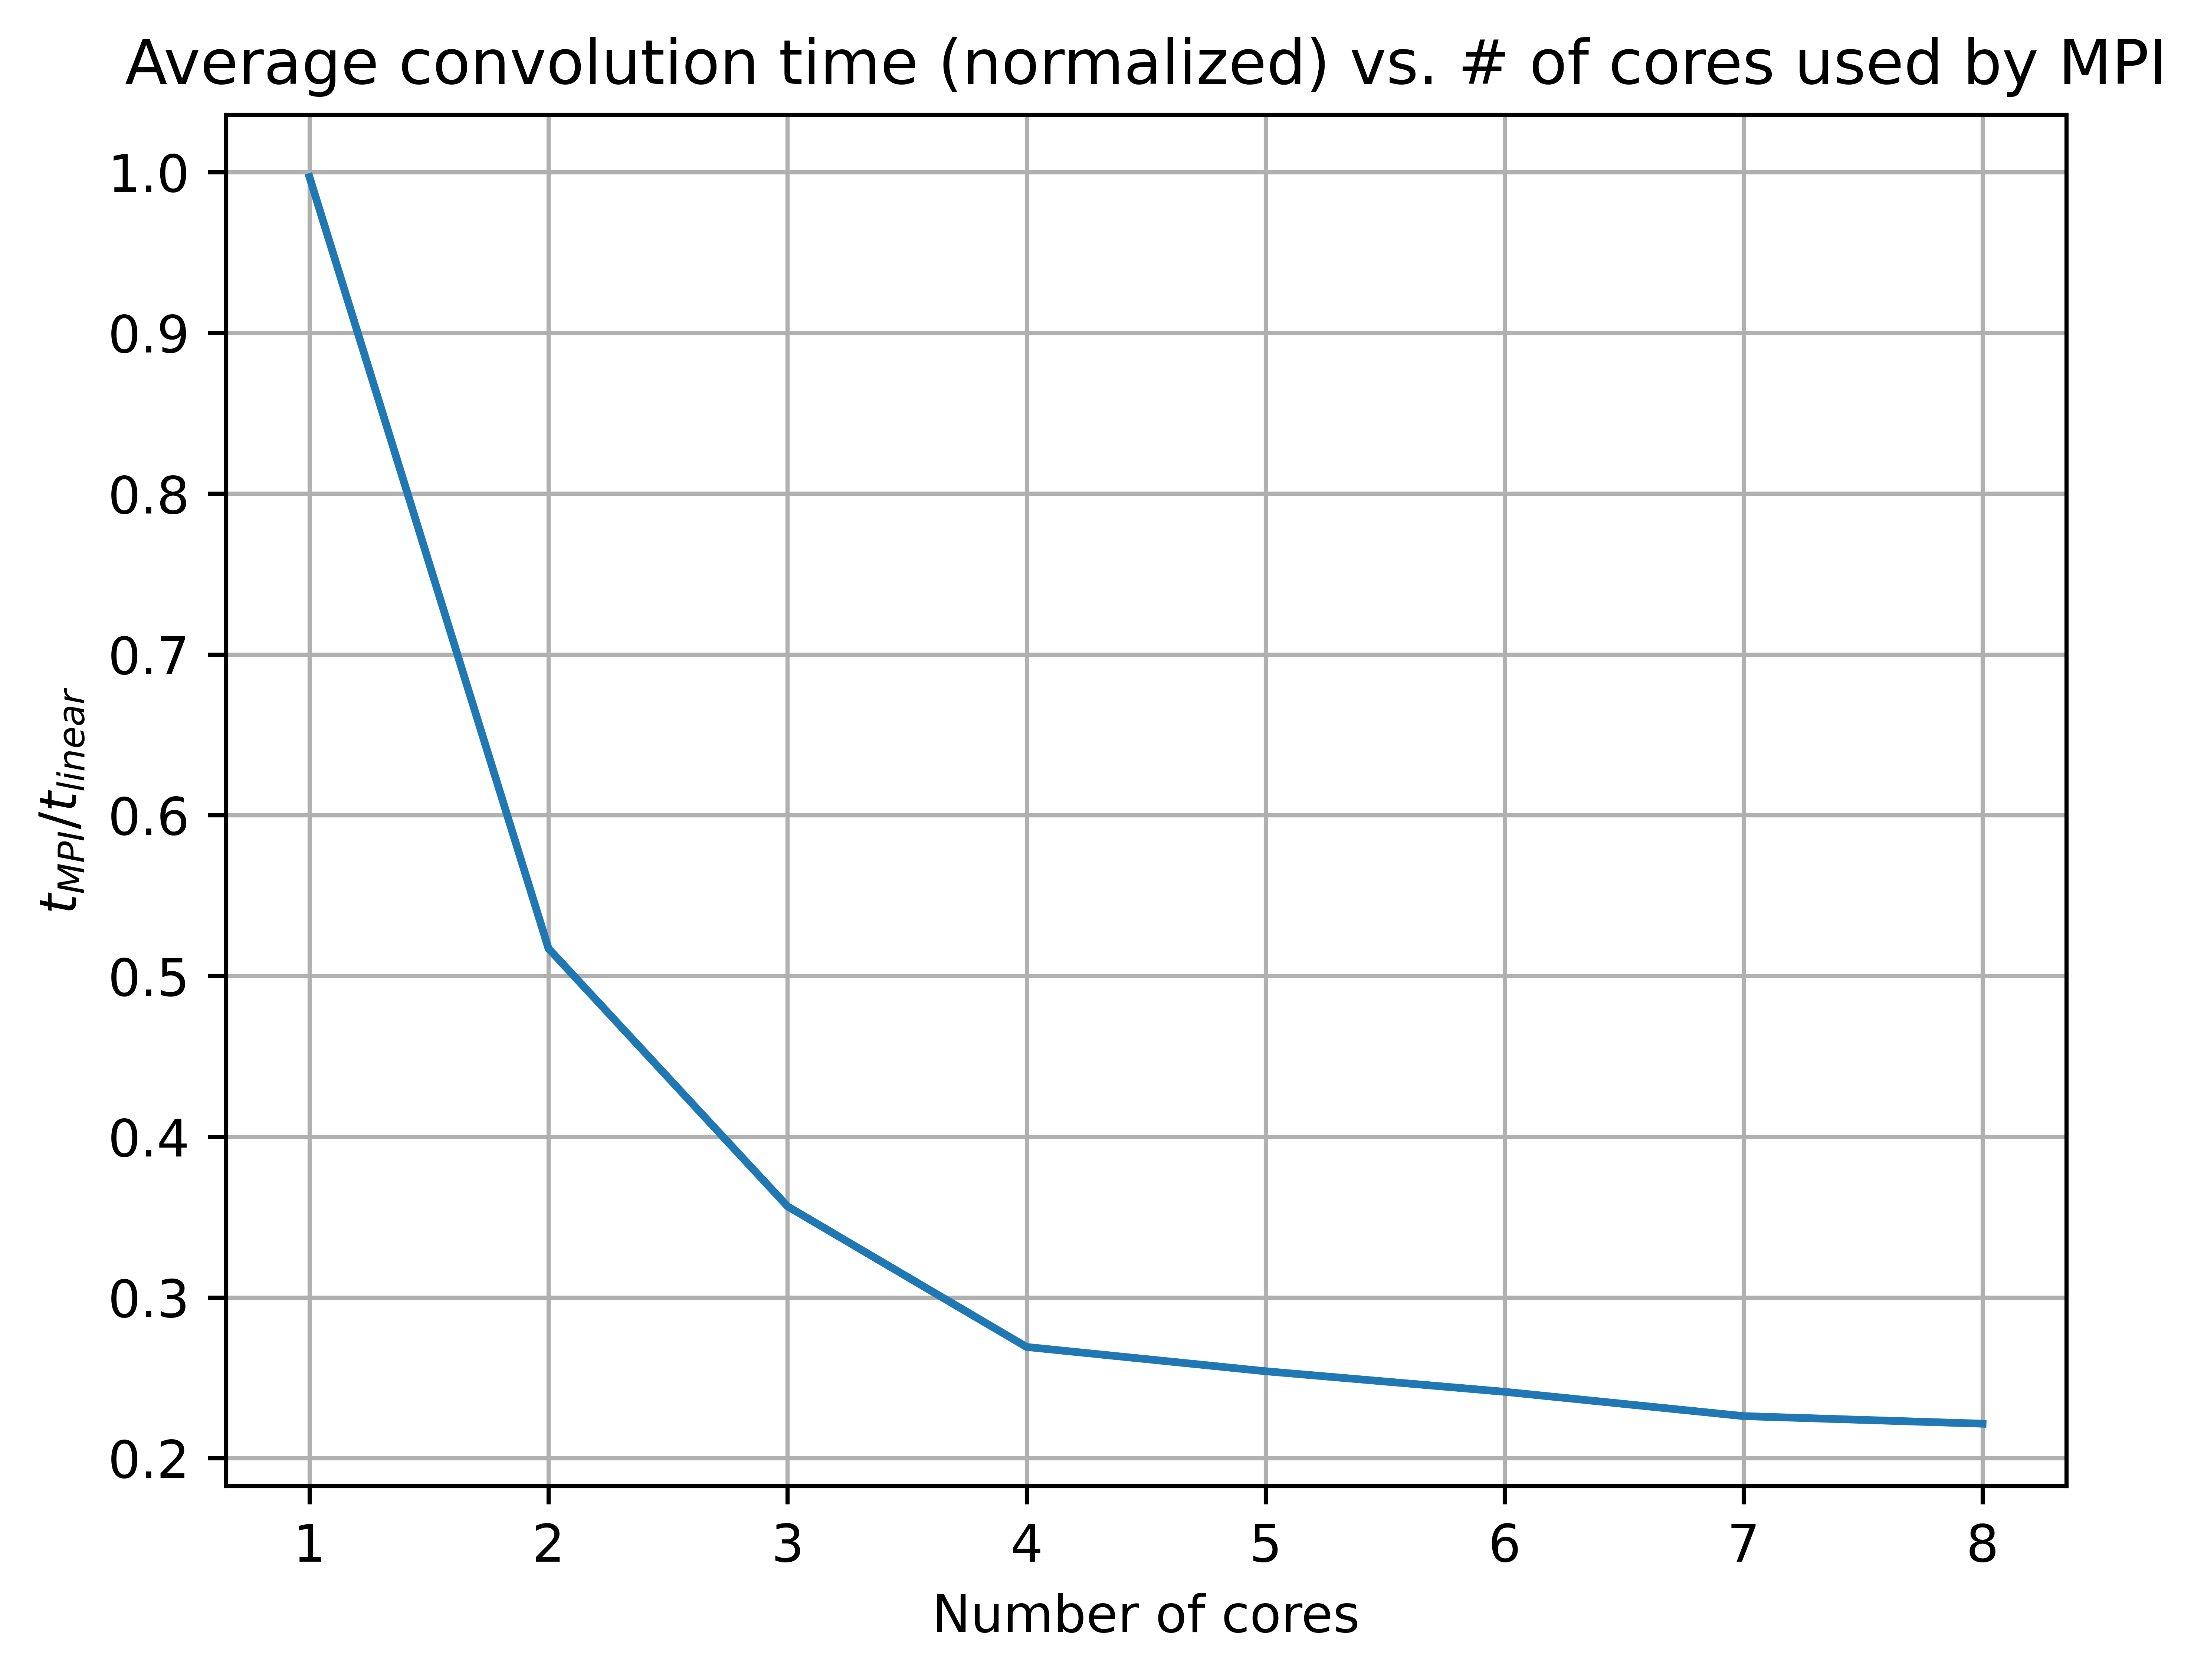

In [132]:
fig0, ax0 = plt.subplots()
fig0.dpi = 1000
ax0.plot(thread_num[~np.isnan(MPI_imp)], MPI_imp[~np.isnan(MPI_imp)]/lin_imp)
# ax0.plot(thread_num[~np.isnan(MPI_imp)], [lin_imp]*len(MPI_imp[~np.isnan(MPI_imp)]))
ax0.grid()
ax0.set_xlabel(r"Number of cores")
ax0.set_ylabel(r"$t_{MPI}/t_{linear}$")
ax0.set_title(r"Average convolution time (normalized) vs. # of cores used by MPI")

Text(0.5, 1.0, 'Average convolution time versus number of threads used by Pthreads')

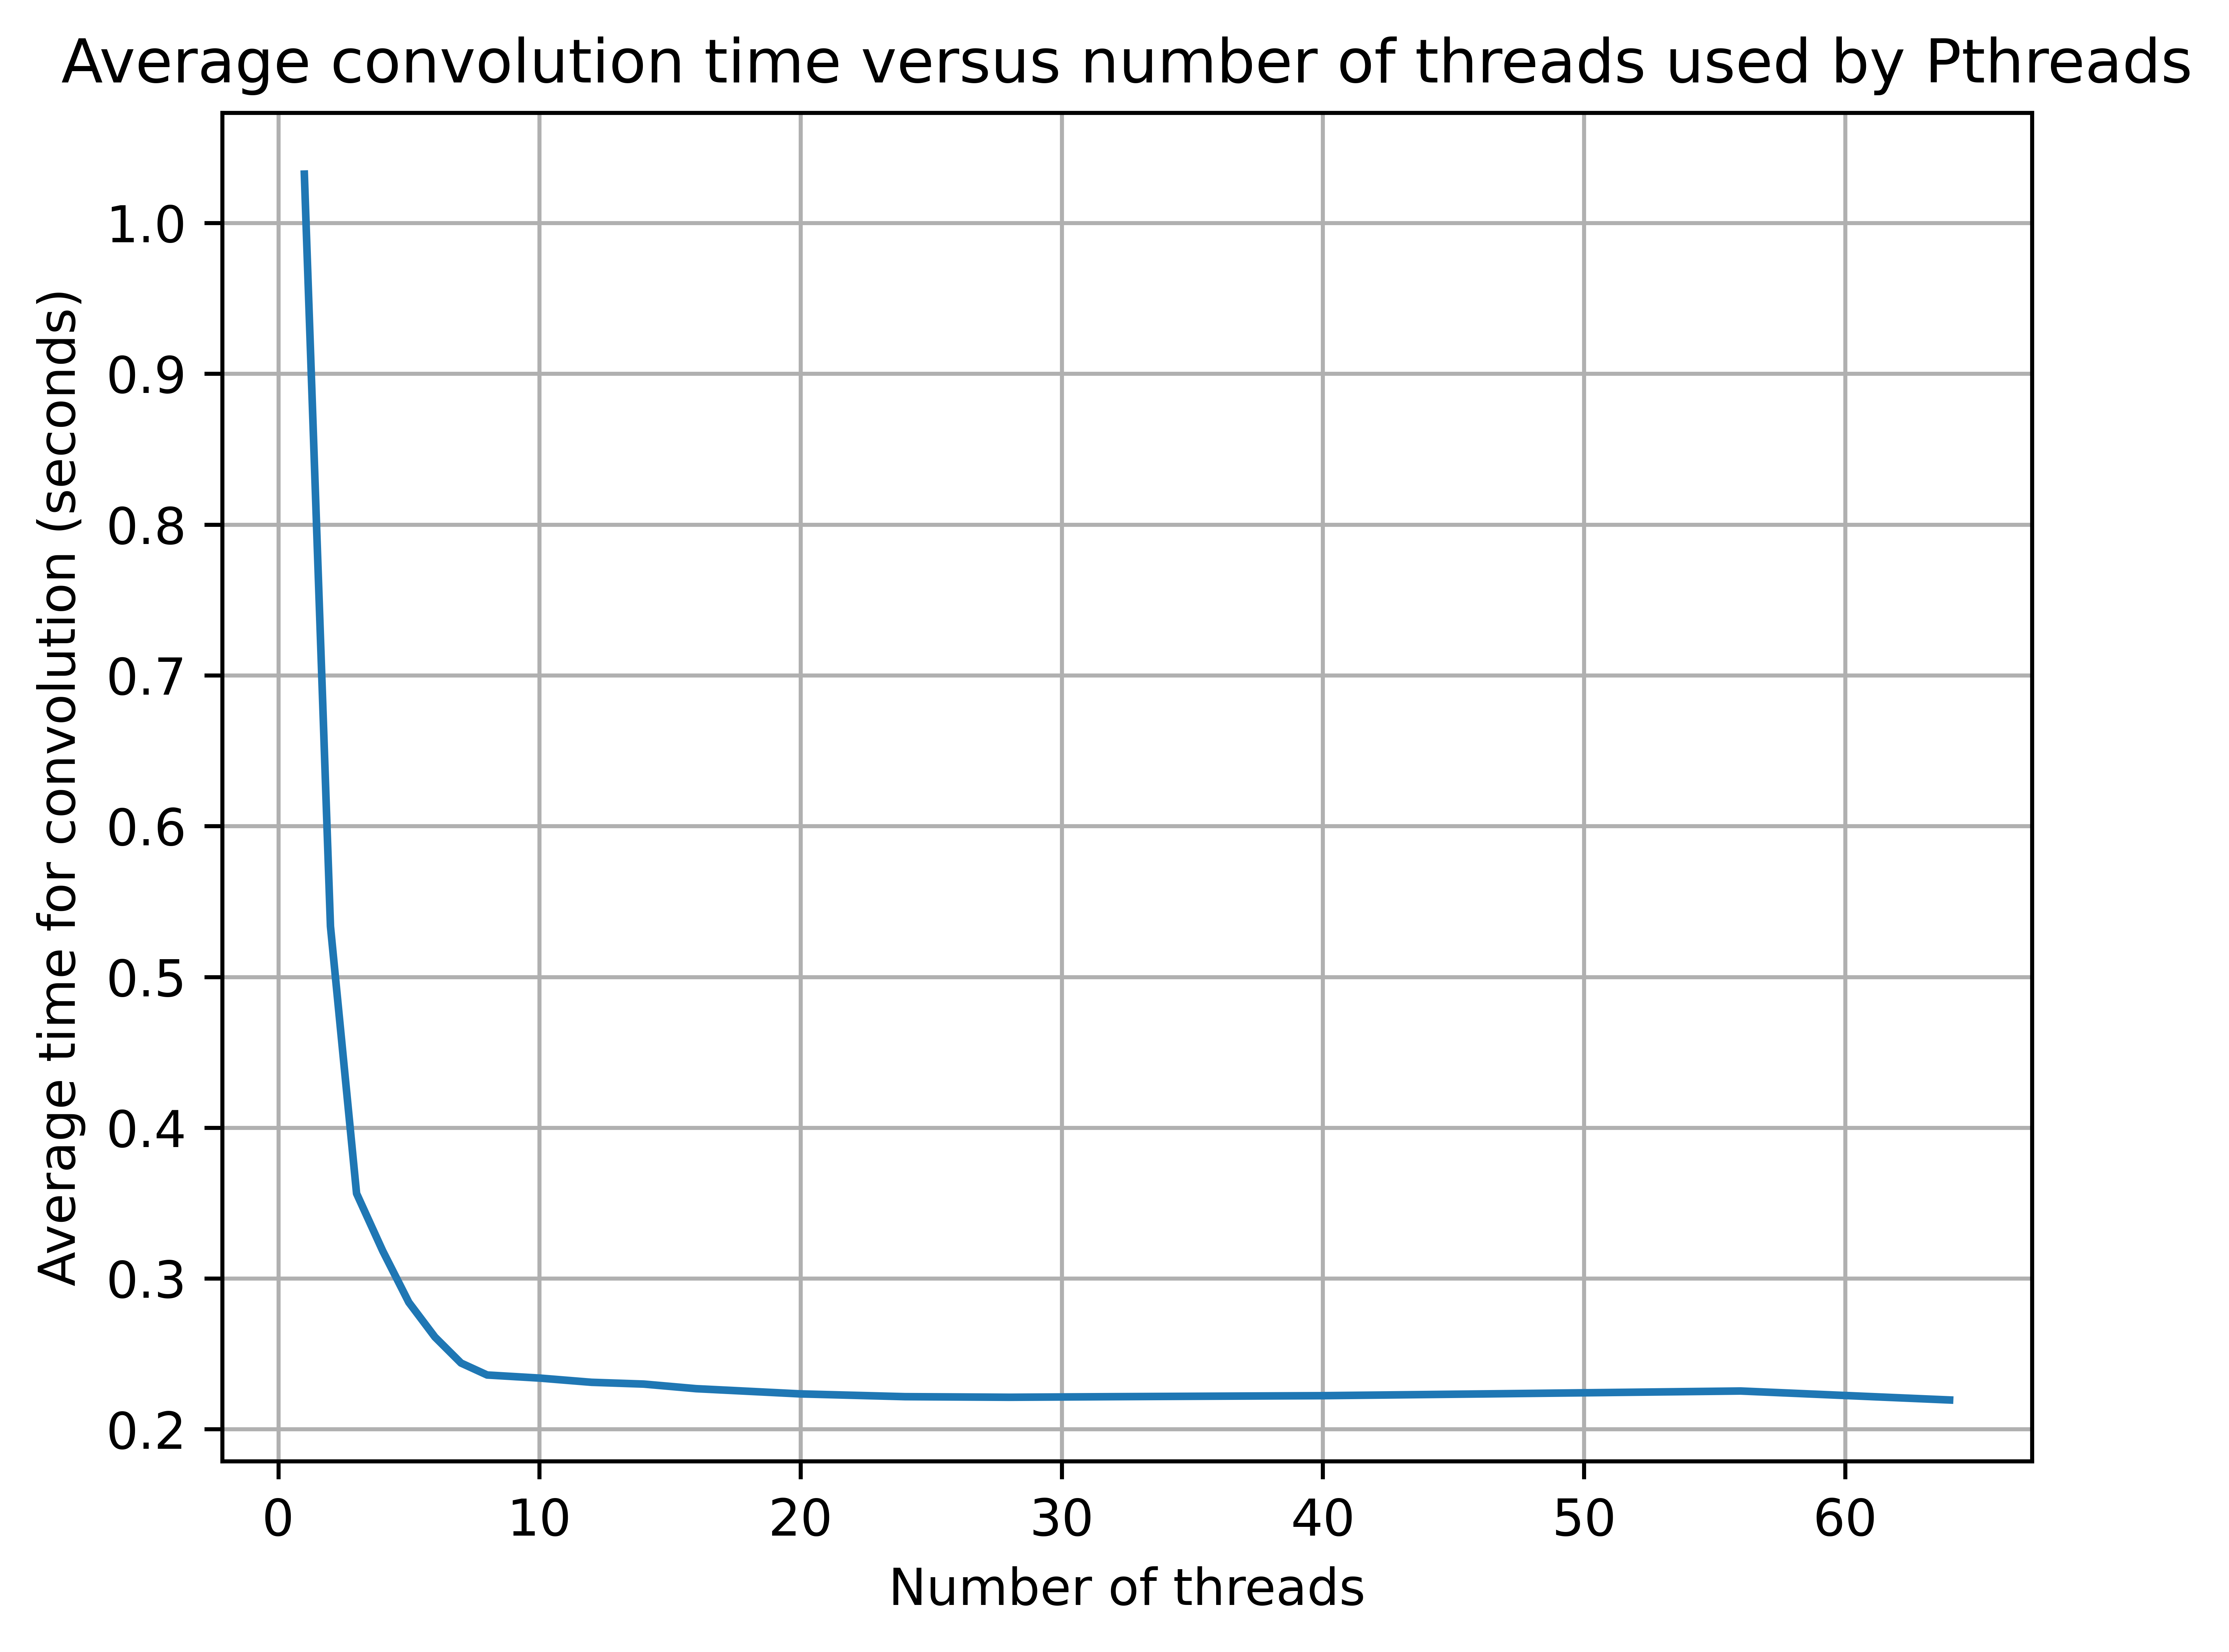

In [133]:
fig1, ax1 = plt.subplots()
fig1.dpi = 1000
ax1.plot(thread_num[~np.isnan(pth_imp)], pth_imp[~np.isnan(pth_imp)]/lin_imp)
# ax1.plot(thread_num[~np.isnan(pth_imp)], [lin_imp]*len(pth_imp[~np.isnan(pth_imp)]))
ax1.grid()
ax1.set_xlabel(r"Number of threads")
ax1.set_ylabel(f"Average time for convolution (seconds)")
ax1.set_title(f"Average convolution time versus number of threads used by Pthreads")

Text(0.5, 1.0, 'Average convolution time vs. number of SPs (1 block)')

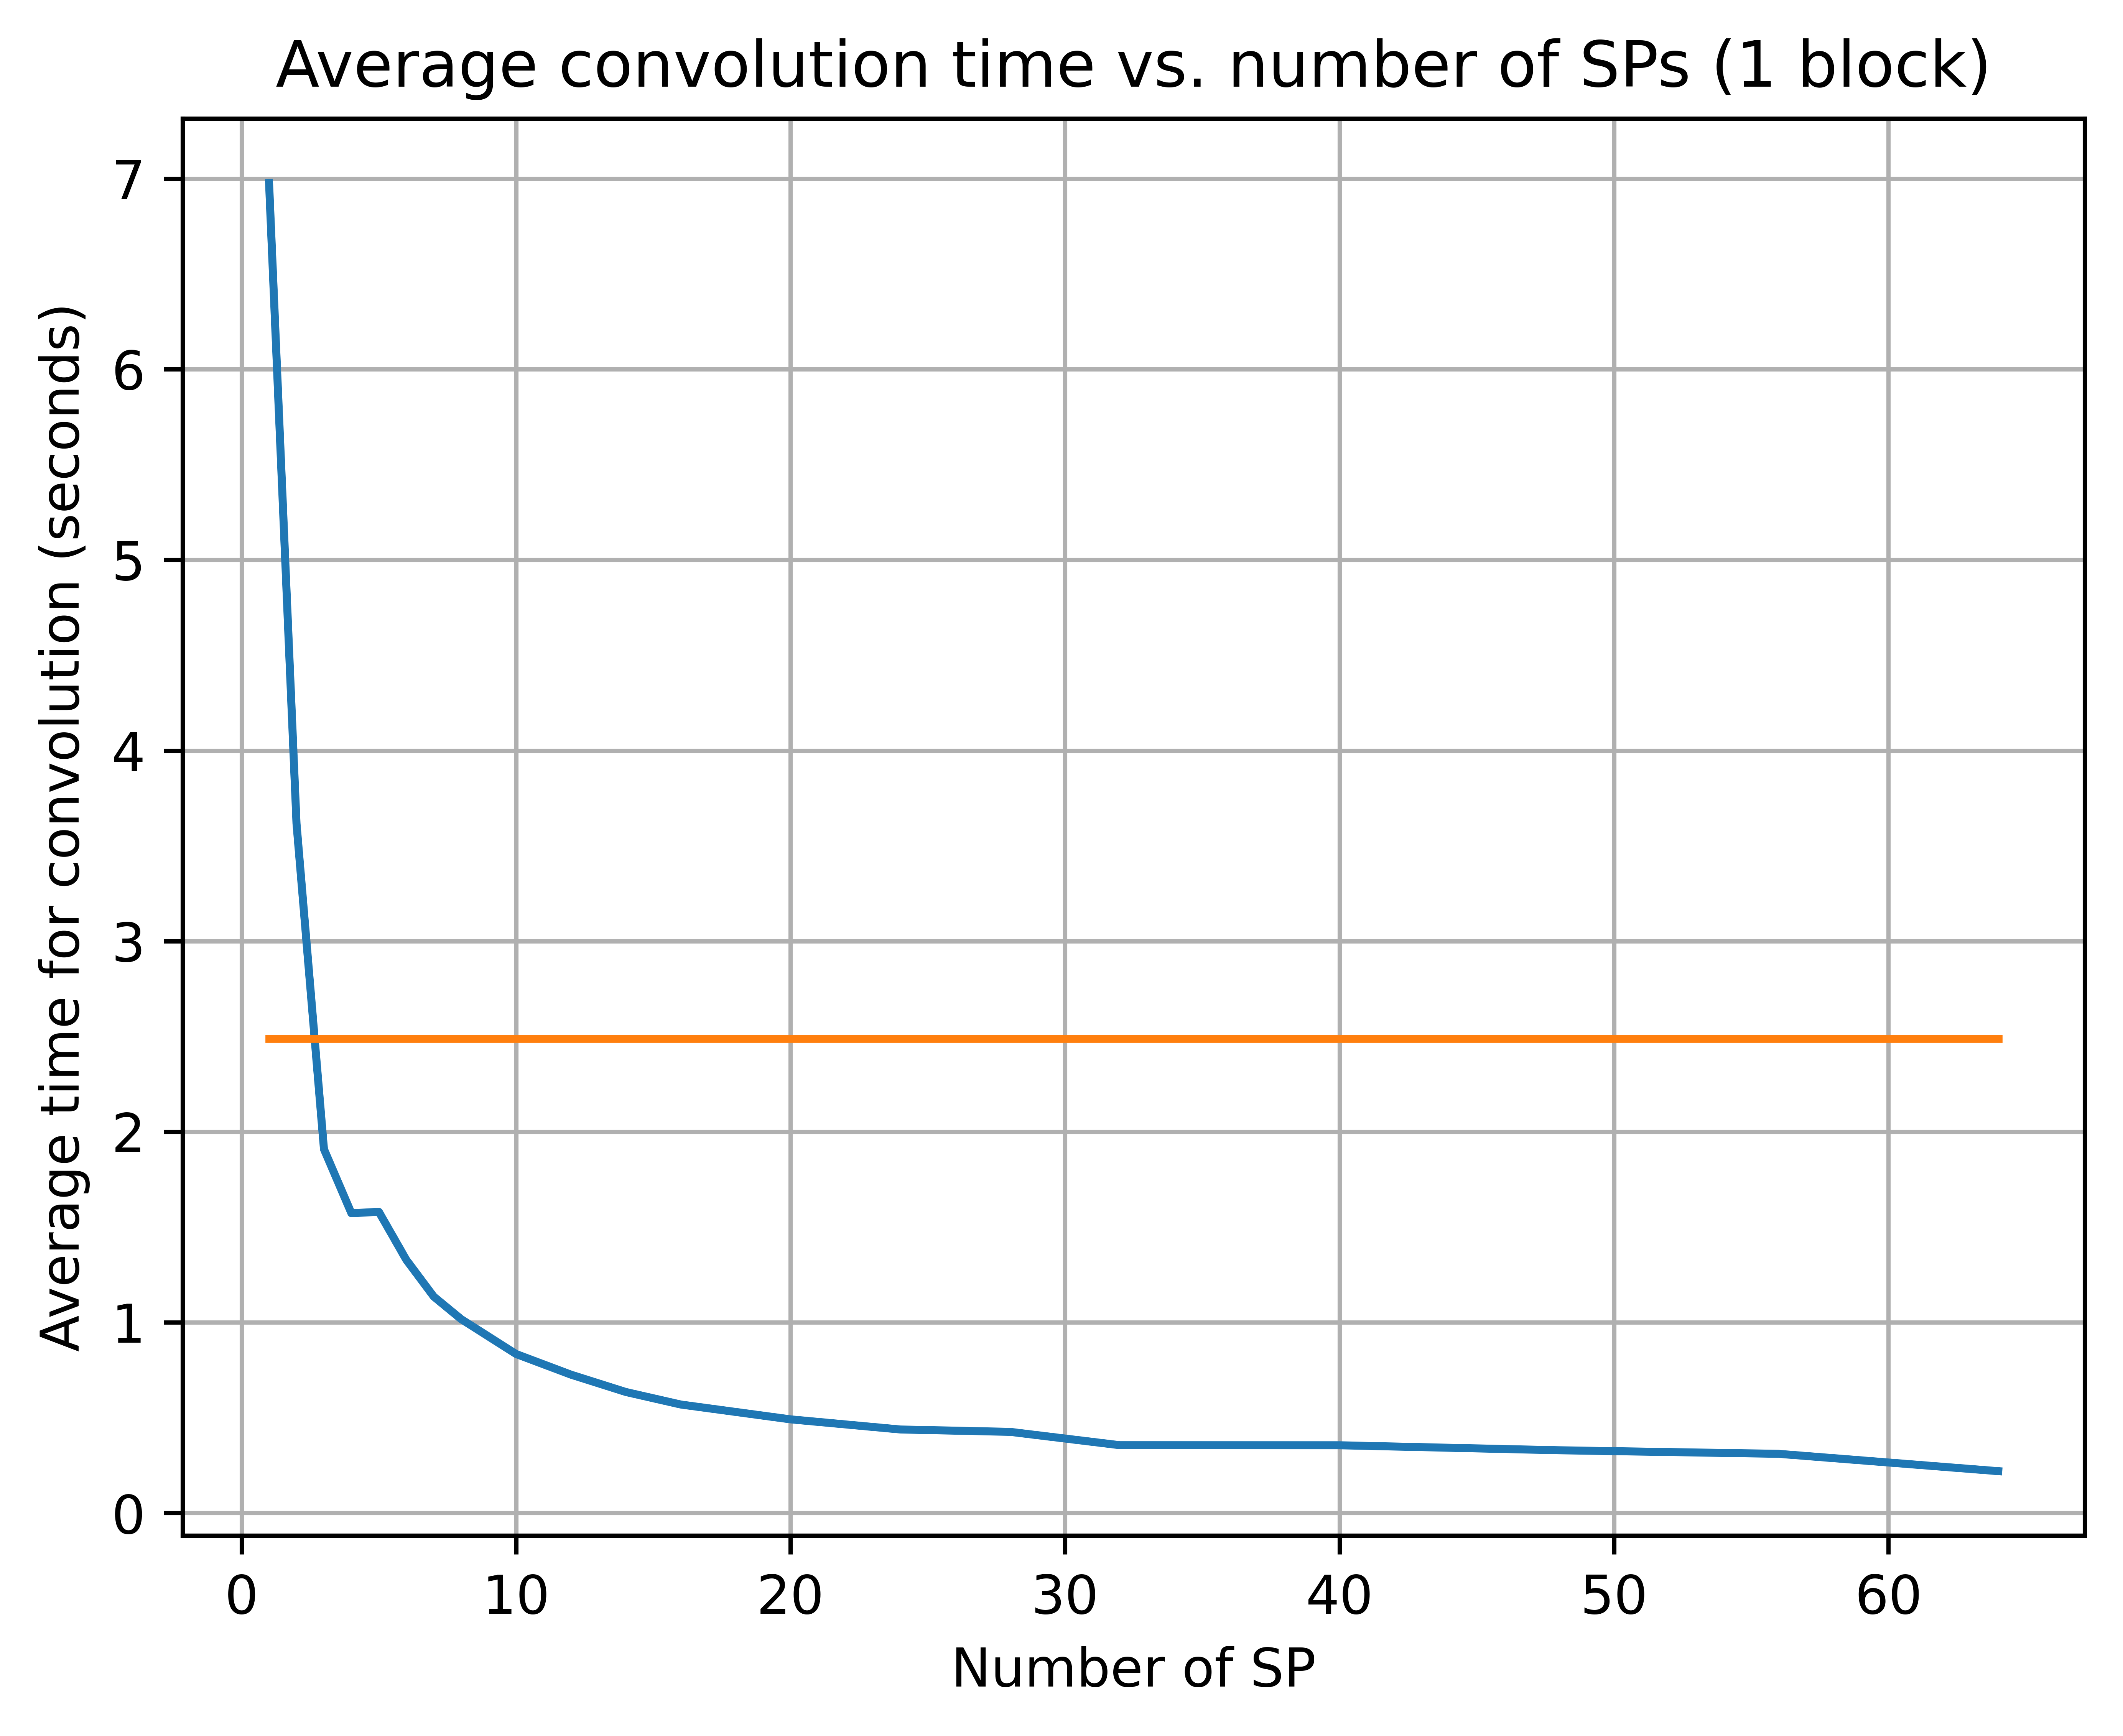

In [73]:
fig2, ax2 = plt.subplots()
fig2.dpi = 1000
ax2.plot(thread_num[~np.isnan(cd1blk_imp)], cd1blk_imp[~np.isnan(cd1blk_imp)])
ax2.plot(thread_num[~np.isnan(cd1blk_imp)], [lin_imp]*len(cd1blk_imp[~np.isnan(cd1blk_imp)]))
ax2.grid()
ax2.set_xlabel(f"Number of SP")
ax2.set_ylabel(f"Average time for convolution (seconds)")
ax2.set_title(f"Average convolution time vs. number of SPs (1 block)")

Text(0.5, 1.0, 'Average convolution time vs. number of SPs (2 block)')

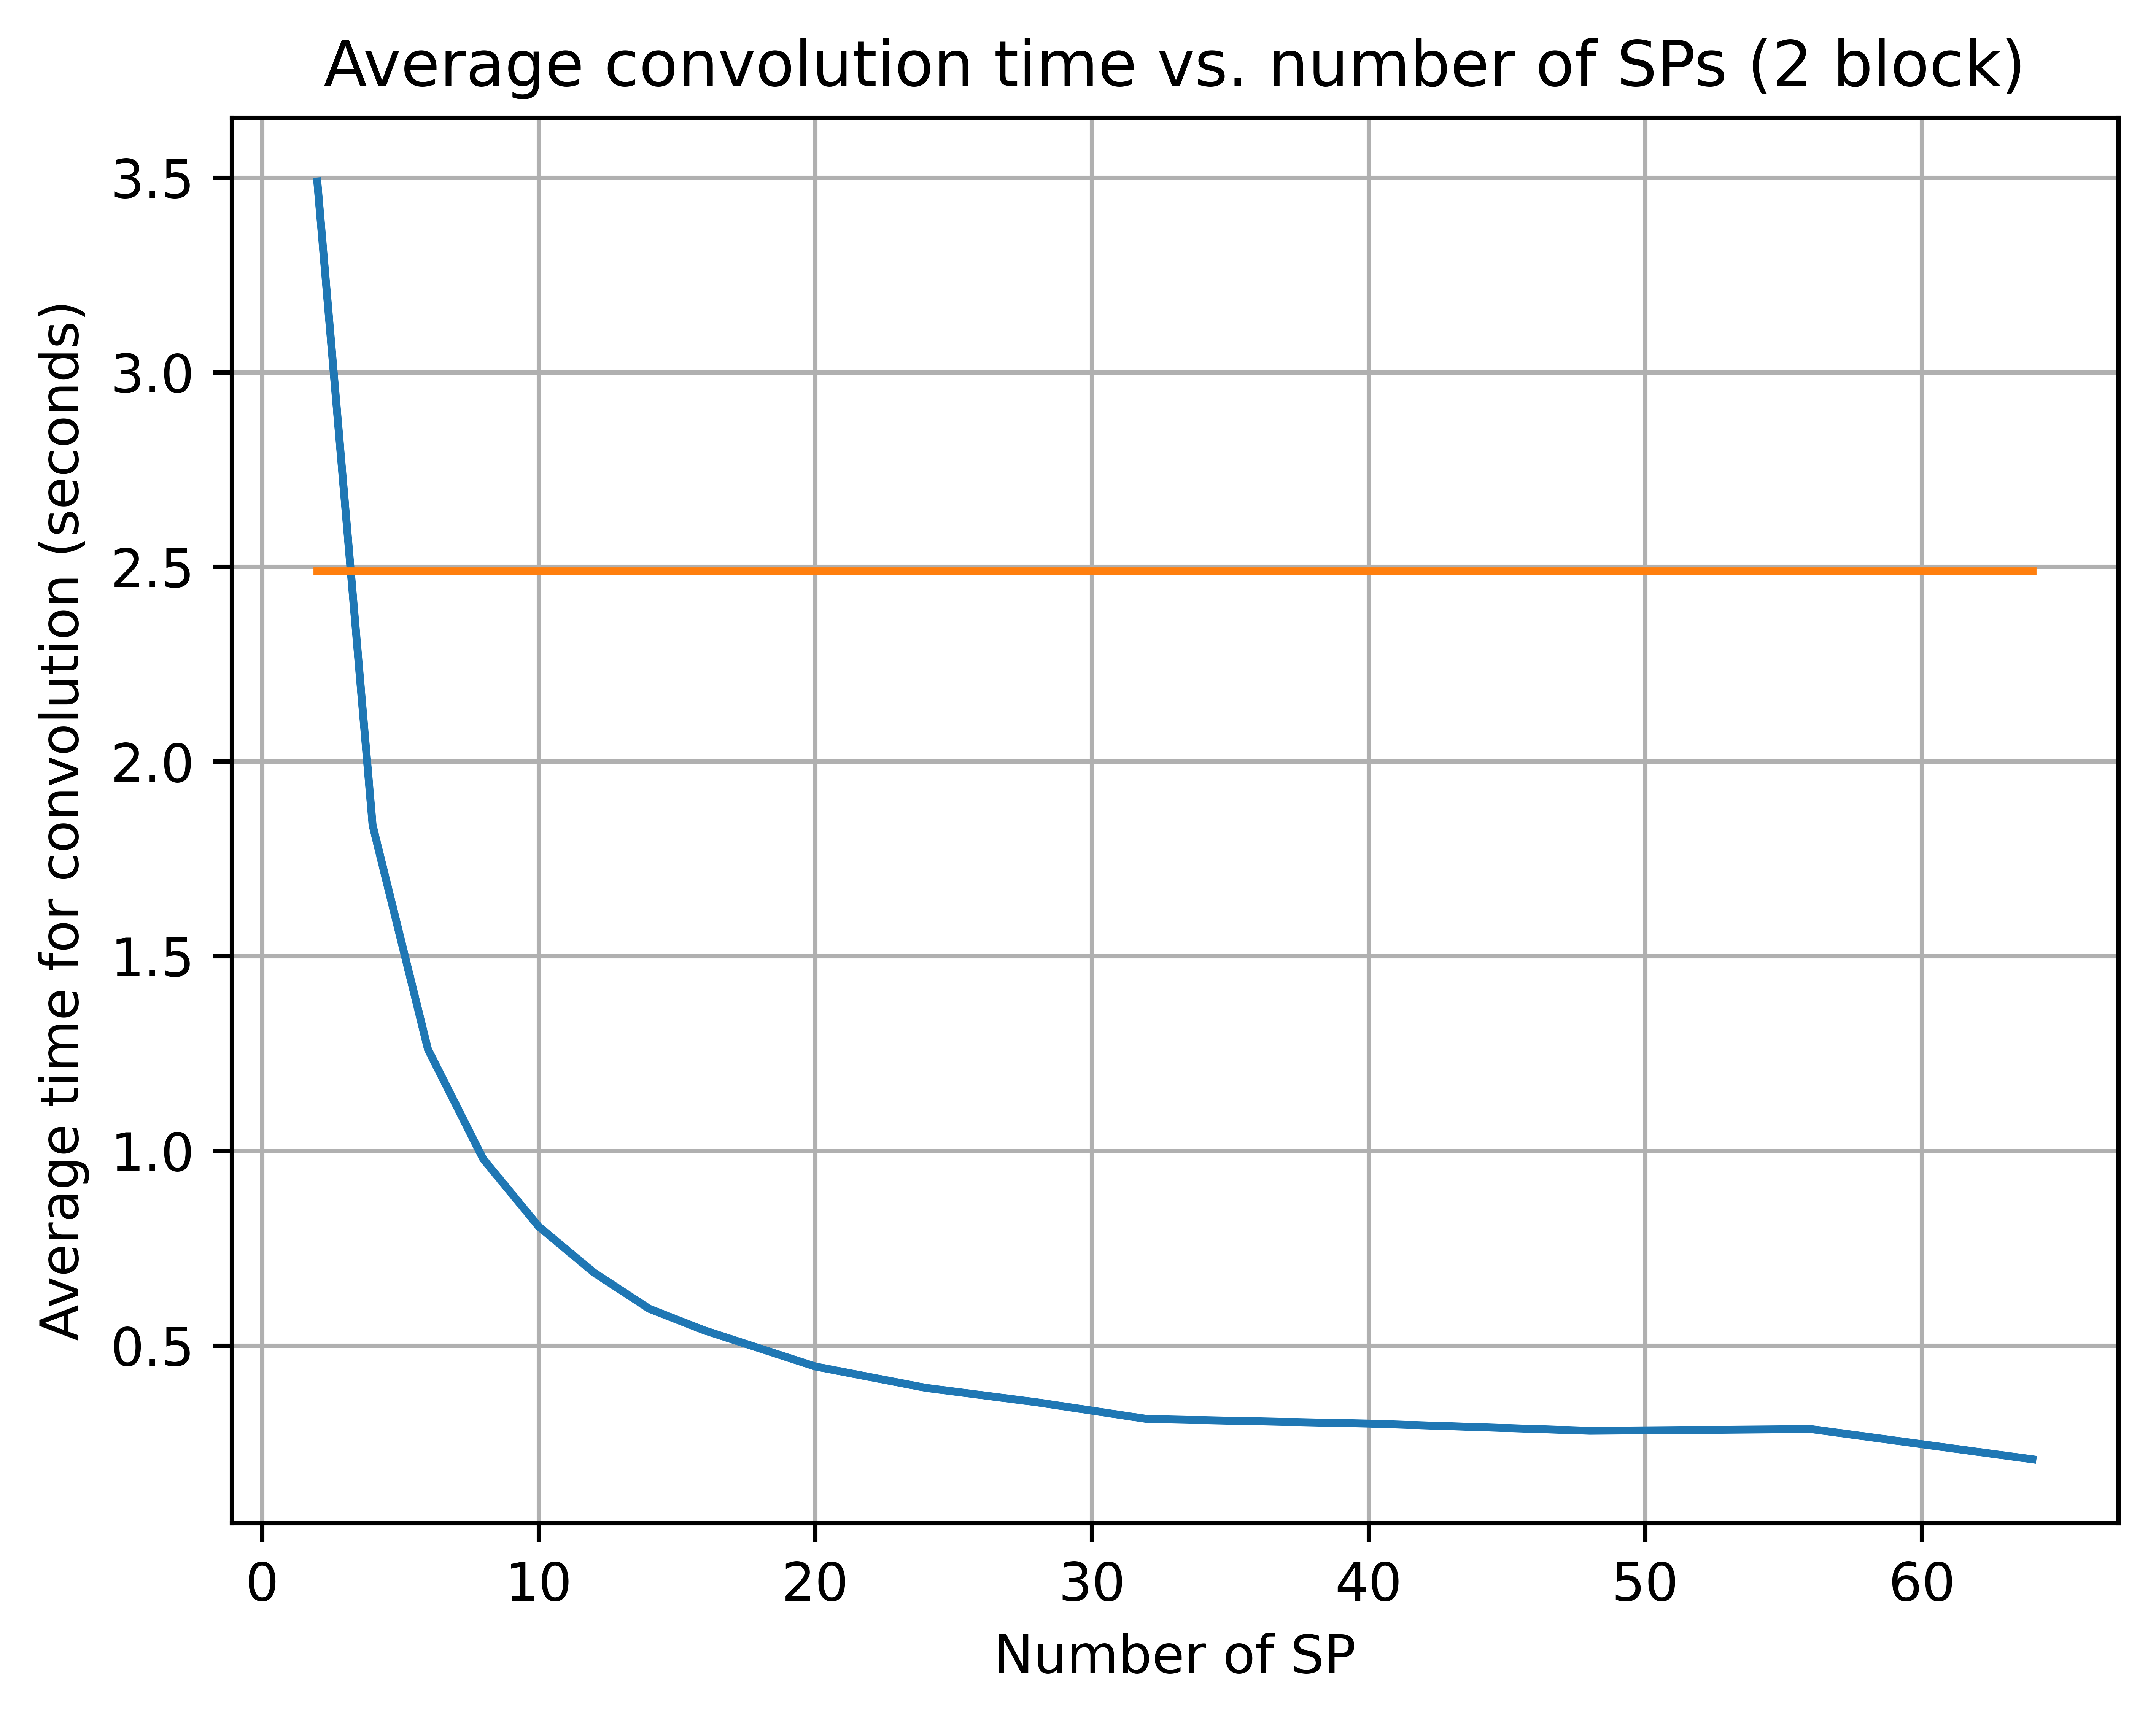

In [72]:
fig3, ax3 = plt.subplots()
fig3.dpi = 1000
ax3.plot(thread_num[~np.isnan(cd2blk_imp)], cd2blk_imp[~np.isnan(cd2blk_imp)])
ax3.plot(thread_num[~np.isnan(cd2blk_imp)], [lin_imp]*len(cd2blk_imp[~np.isnan(cd2blk_imp)]))
ax3.grid()
ax3.set_xlabel(f"Number of SP")
ax3.set_ylabel(f"Average time for convolution (seconds)")
ax3.set_title(f"Average convolution time vs. number of SPs (2 block)")

Text(0.5, 1.0, 'Average convolution time vs. number of SPs (4 block)')

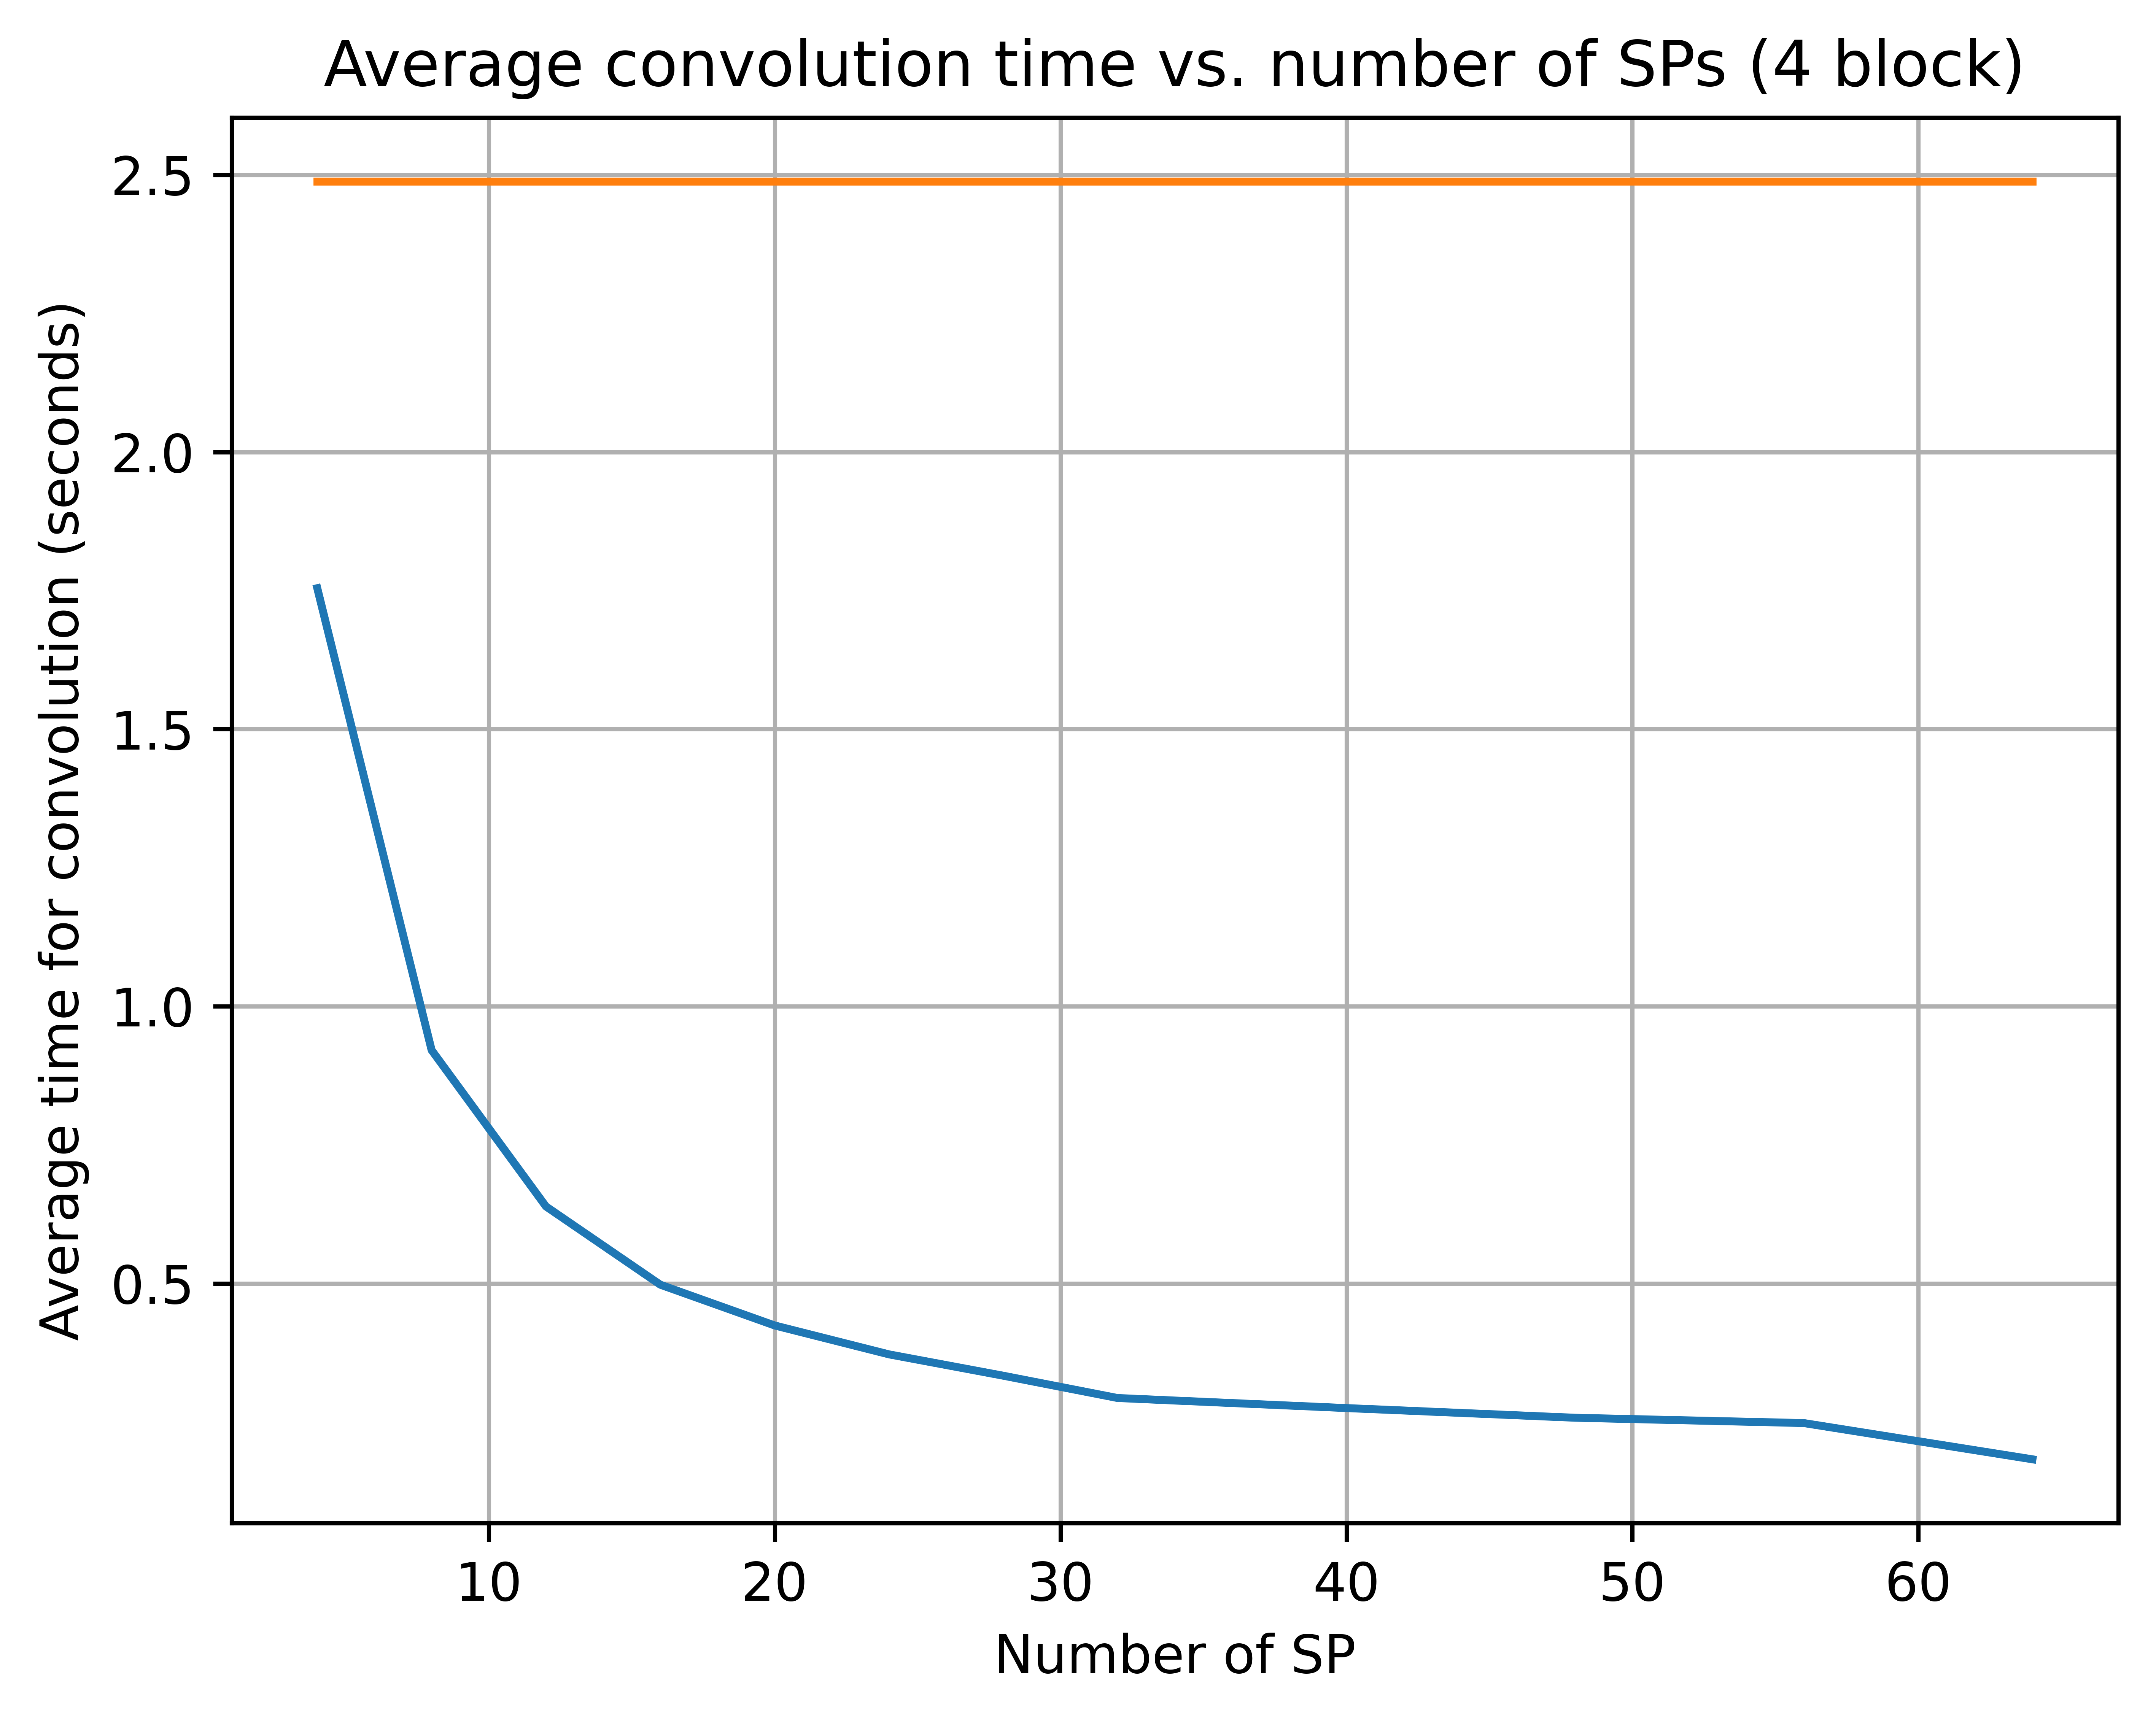

In [71]:
fig4, ax4 = plt.subplots()
fig4.dpi = 1000
ax4.plot(thread_num[~np.isnan(cd4blk_imp)], cd4blk_imp[~np.isnan(cd4blk_imp)])
ax4.plot(thread_num[~np.isnan(cd4blk_imp)], [lin_imp]*len(cd4blk_imp[~np.isnan(cd4blk_imp)]))
ax4.grid()
ax4.set_xlabel(f"Number of SP")
ax4.set_ylabel(f"Average time for convolution (seconds)")
ax4.set_title(f"Average convolution time vs. number of SPs (4 block)")

Text(0.5, 1.0, 'Average convolution time vs. number of SPs (8 block)')

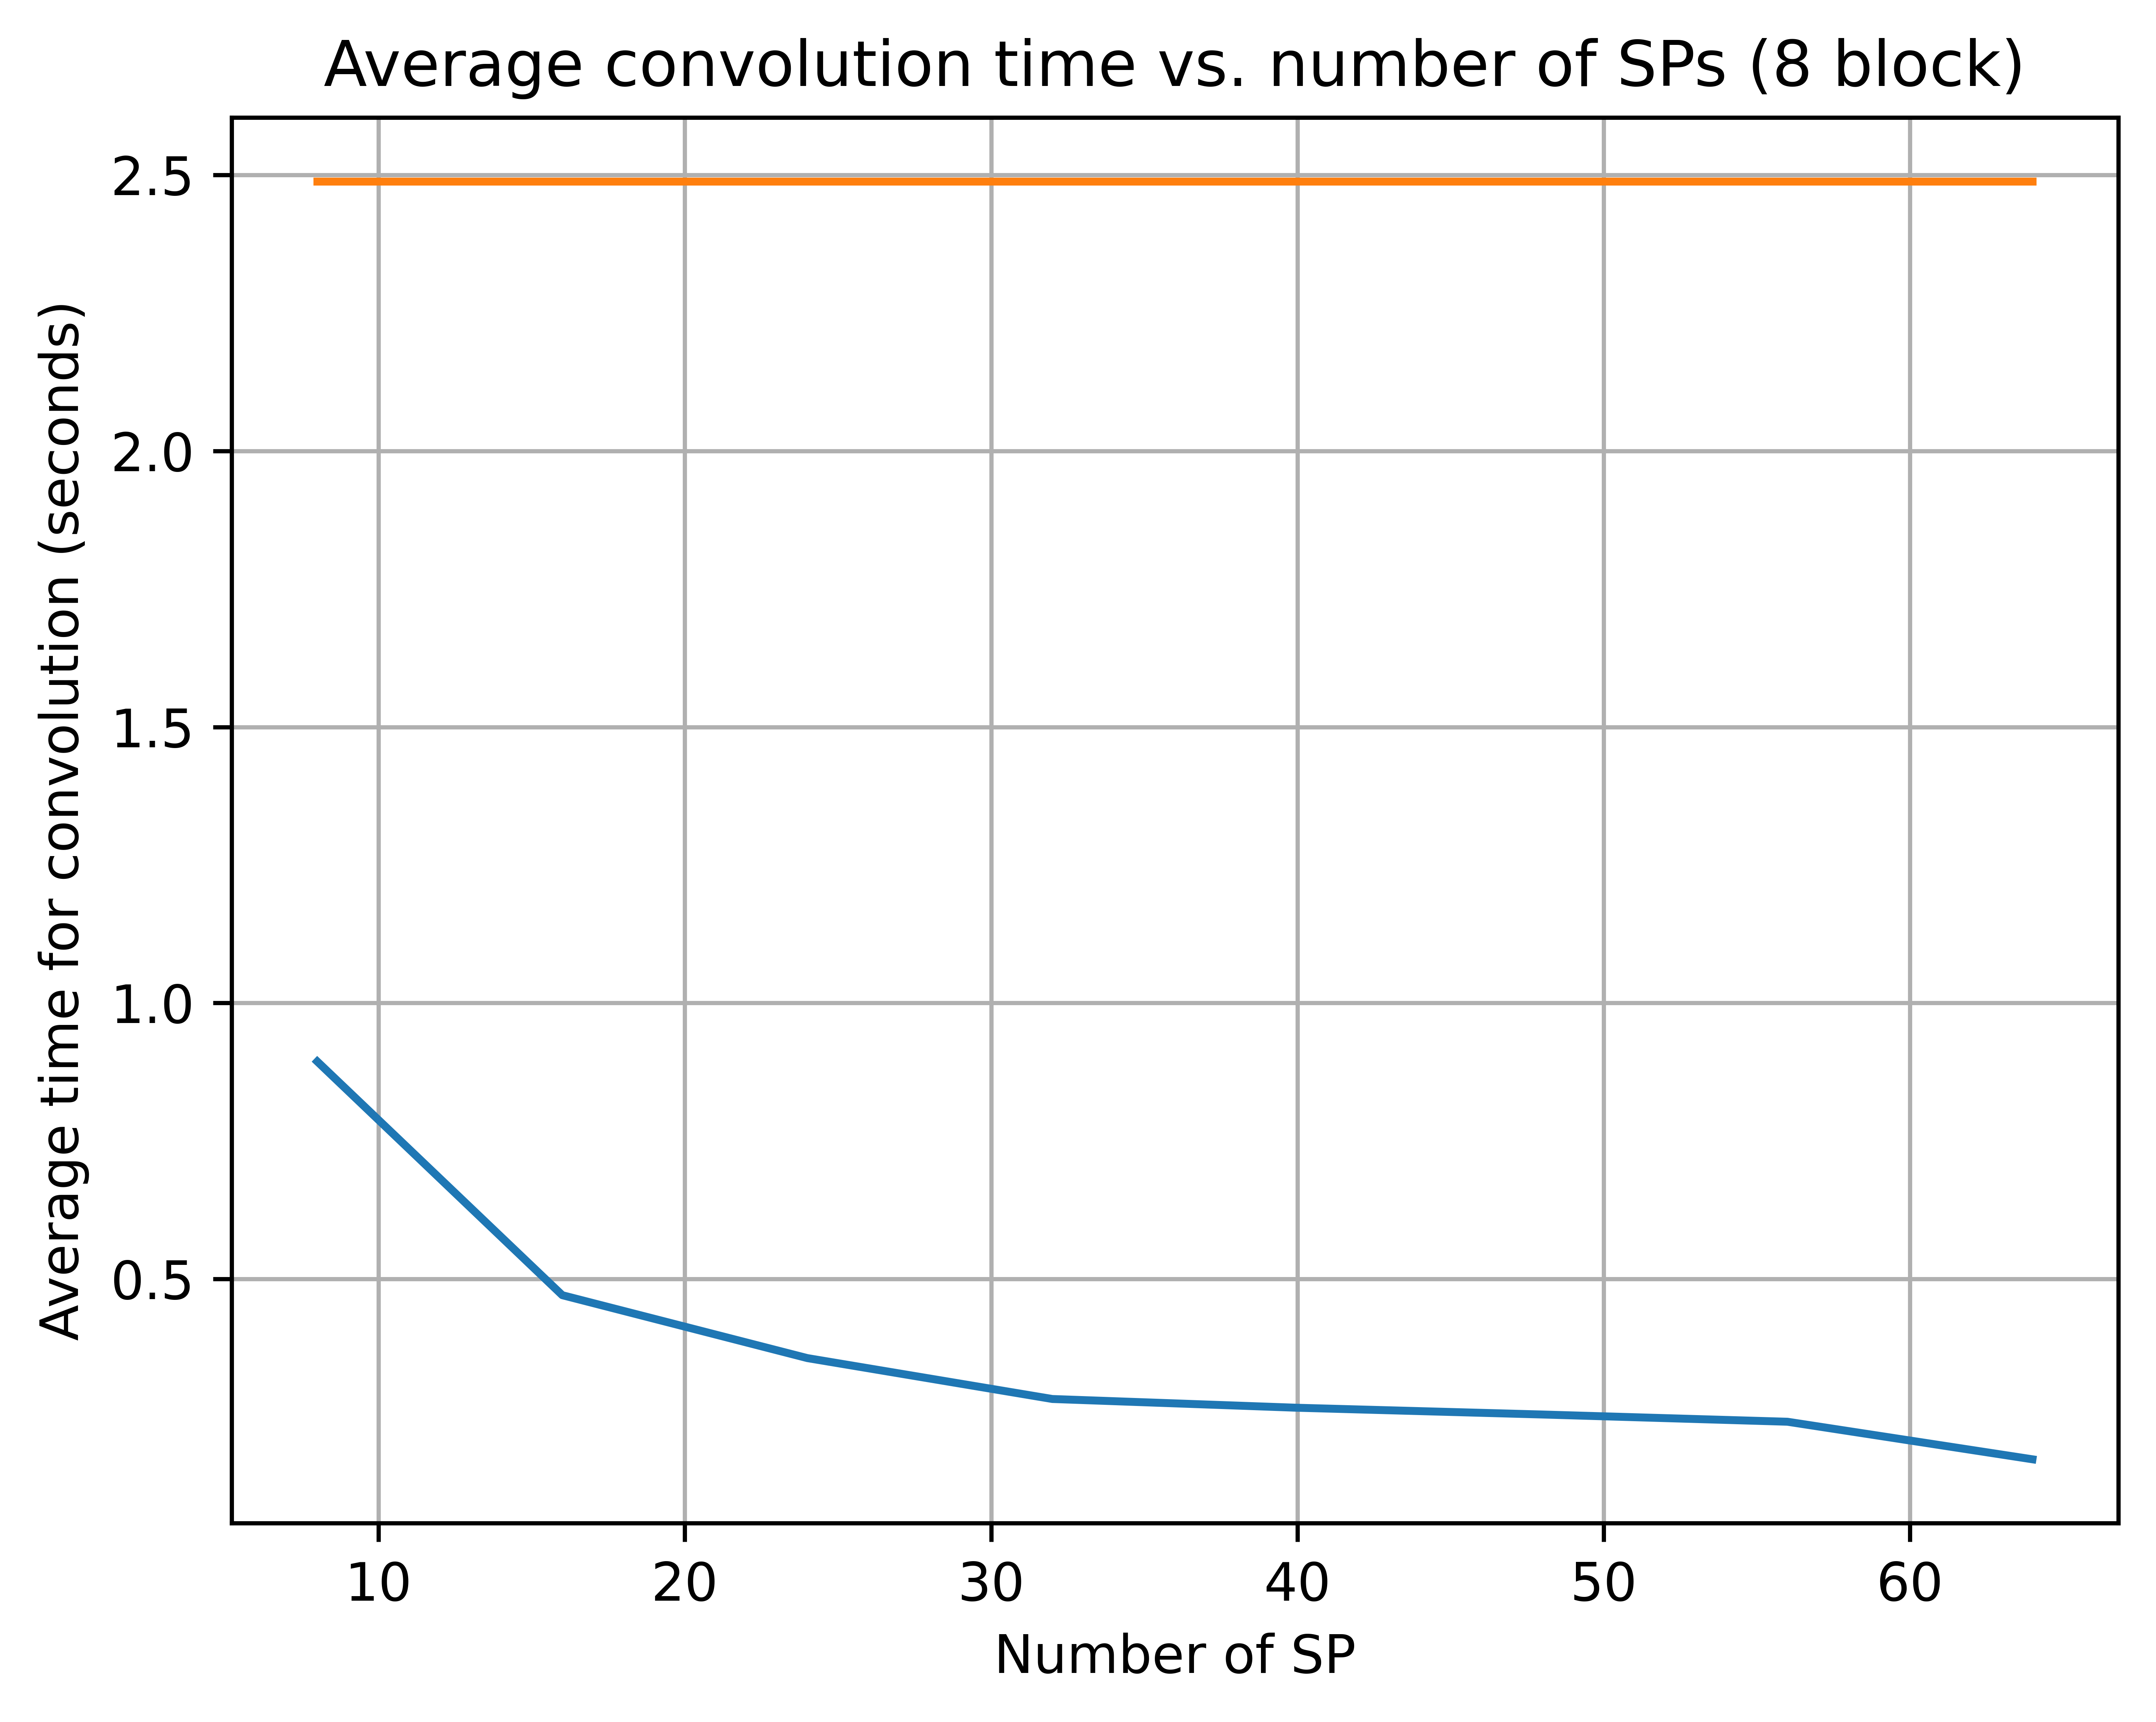

In [76]:
fig5, ax5 = plt.subplots()
fig5.dpi = 1000
ax5.plot(thread_num[~np.isnan(cd8blk_imp)], cd8blk_imp[~np.isnan(cd8blk_imp)])
ax5.plot(thread_num[~np.isnan(cd8blk_imp)], [lin_imp]*len(cd8blk_imp[~np.isnan(cd8blk_imp)]))
ax5.grid()
ax5.set_xlabel(f"Number of SP")
ax5.set_ylabel(f"Average time for convolution (seconds)")
ax5.set_title(f"Average convolution time vs. number of SPs (8 block)")

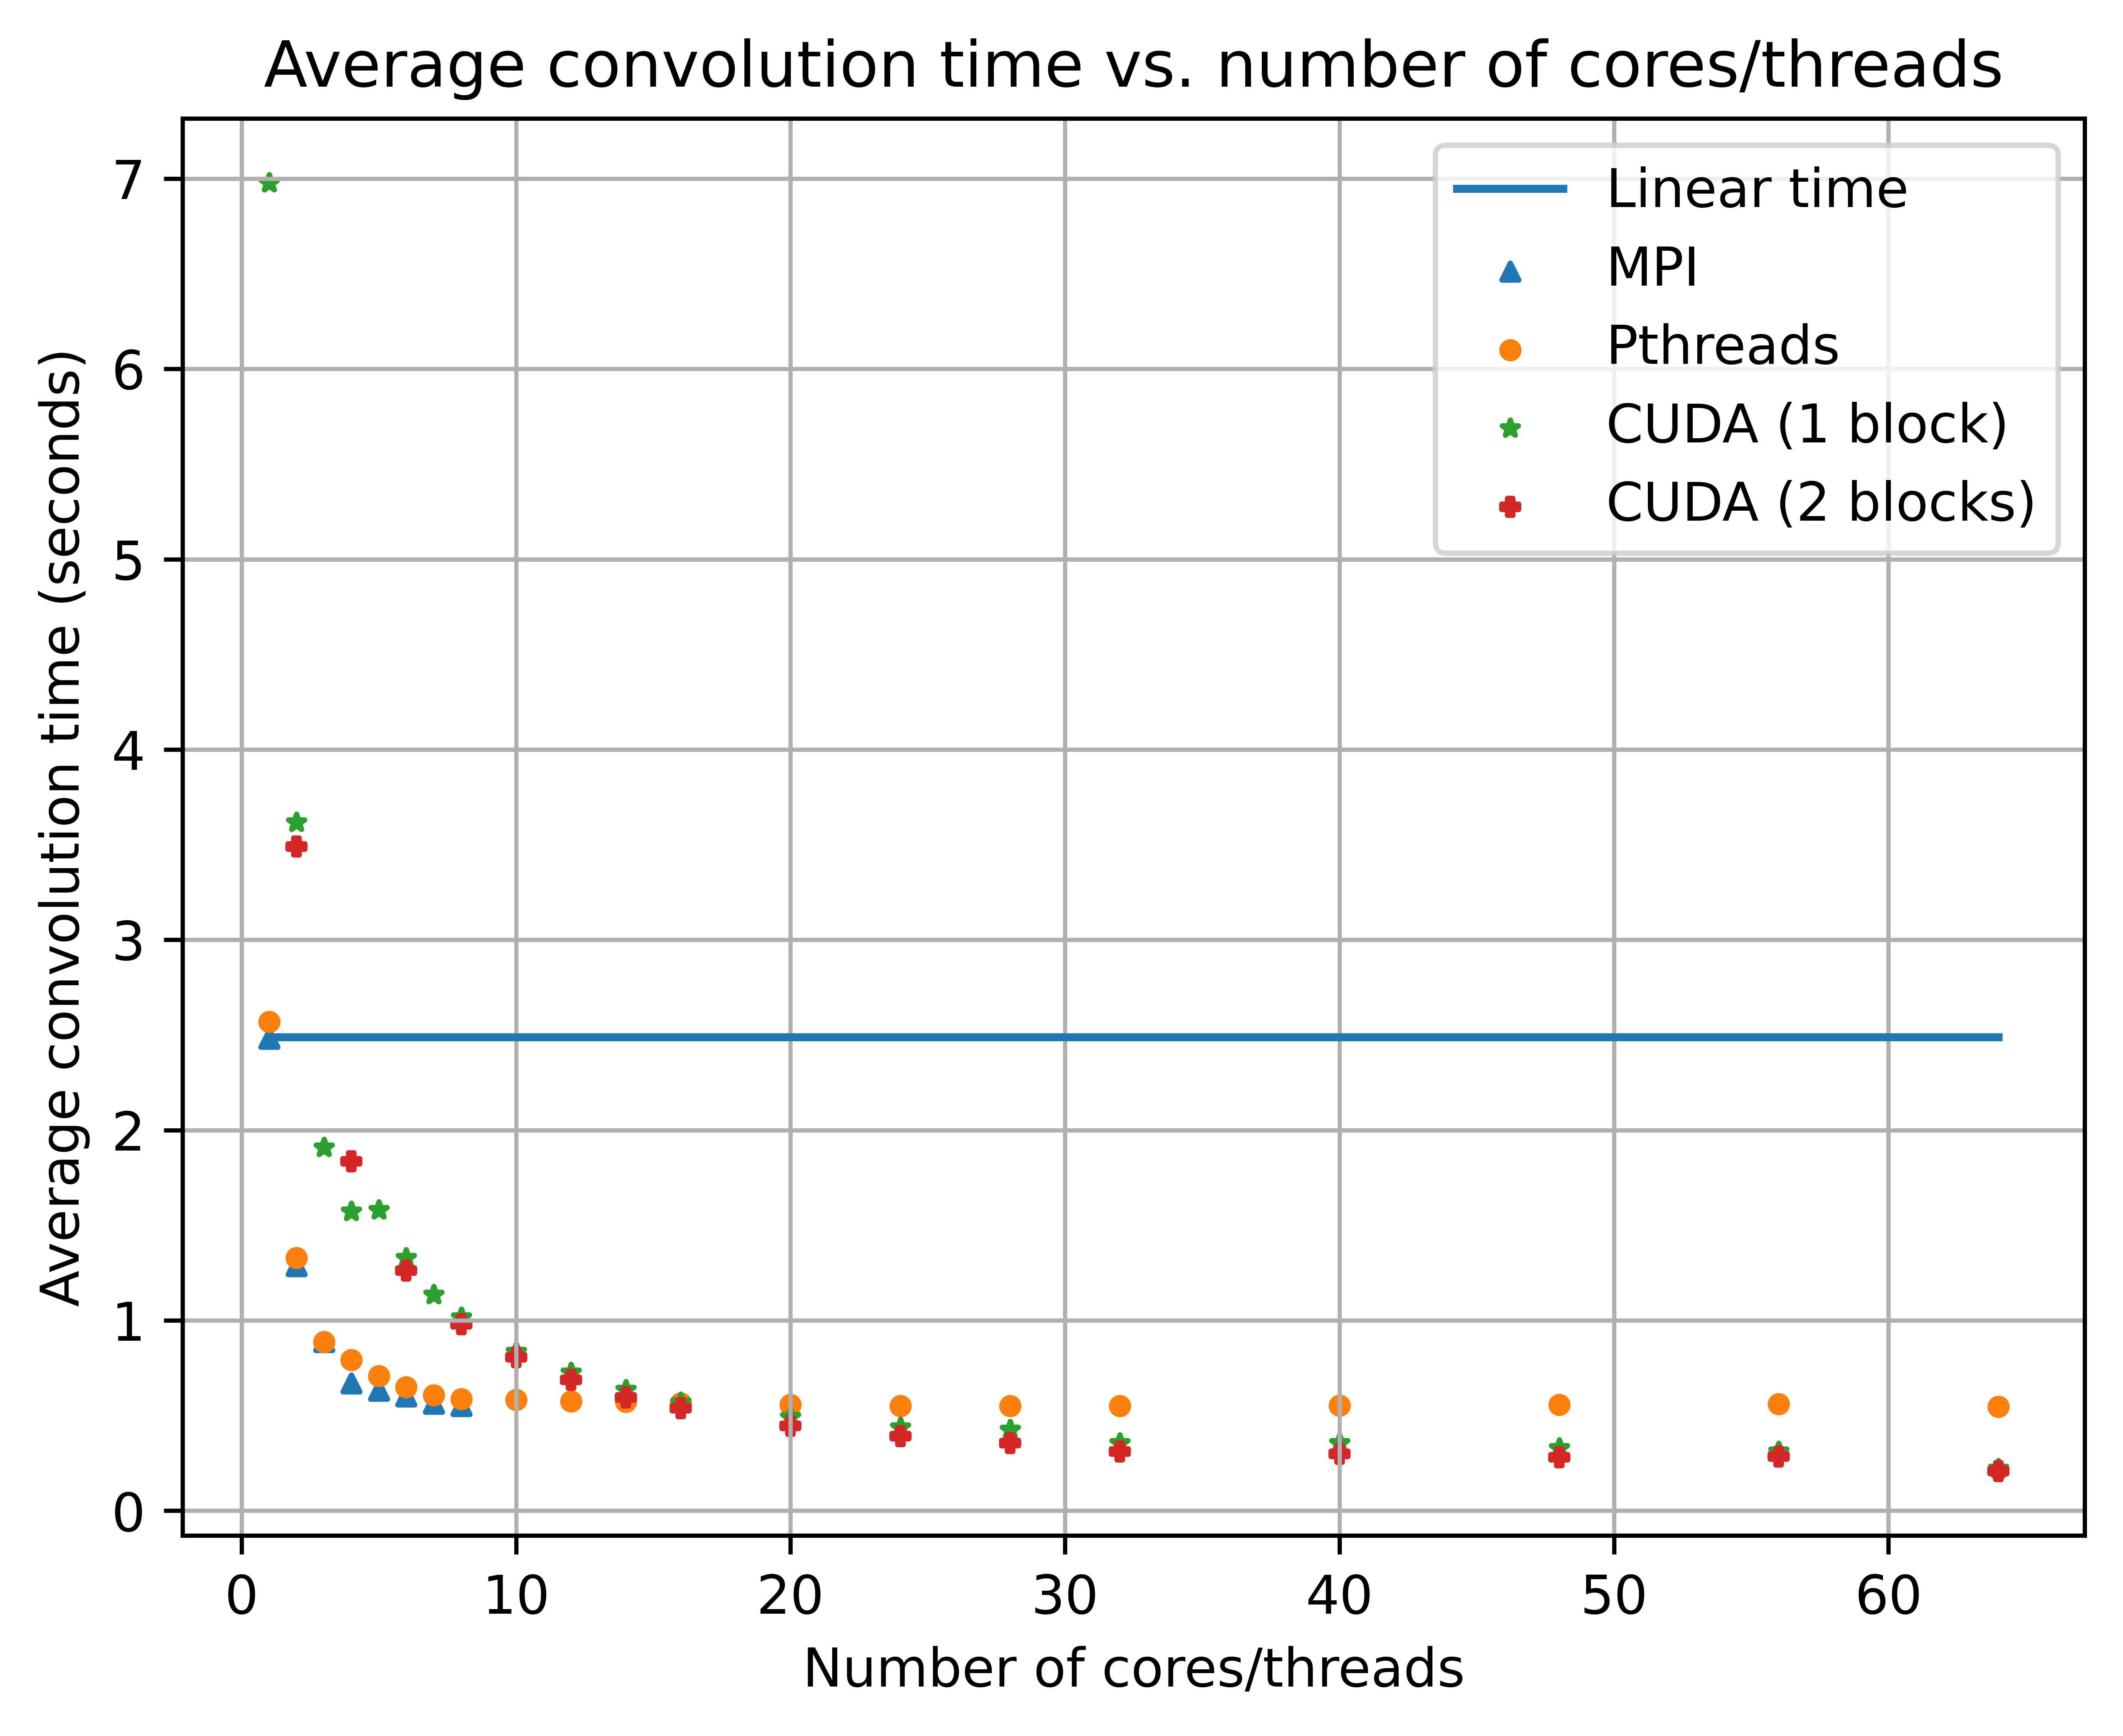

In [87]:
fig6, ax6 = plt.subplots()
fig6.dpi = 1000
ax6.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax6.scatter(thread_num, MPI_imp, label="MPI", s=10, marker="^")
ax6.scatter(thread_num, pth_imp, label="Pthreads", s=10, marker="o")
ax6.scatter(thread_num, cd1blk_imp, label="CUDA (1 block)", s=10, marker="*")
ax6.scatter(thread_num , cd2blk_imp, label="CUDA (2 blocks)", s=10, marker="P")


ax6.set_xlabel("Number of cores/threads")
ax6.set_ylabel("Average convolution time (seconds)")
ax6.set_title("Average convolution time vs. number of cores/threads")
ax6.legend()
ax6.grid()

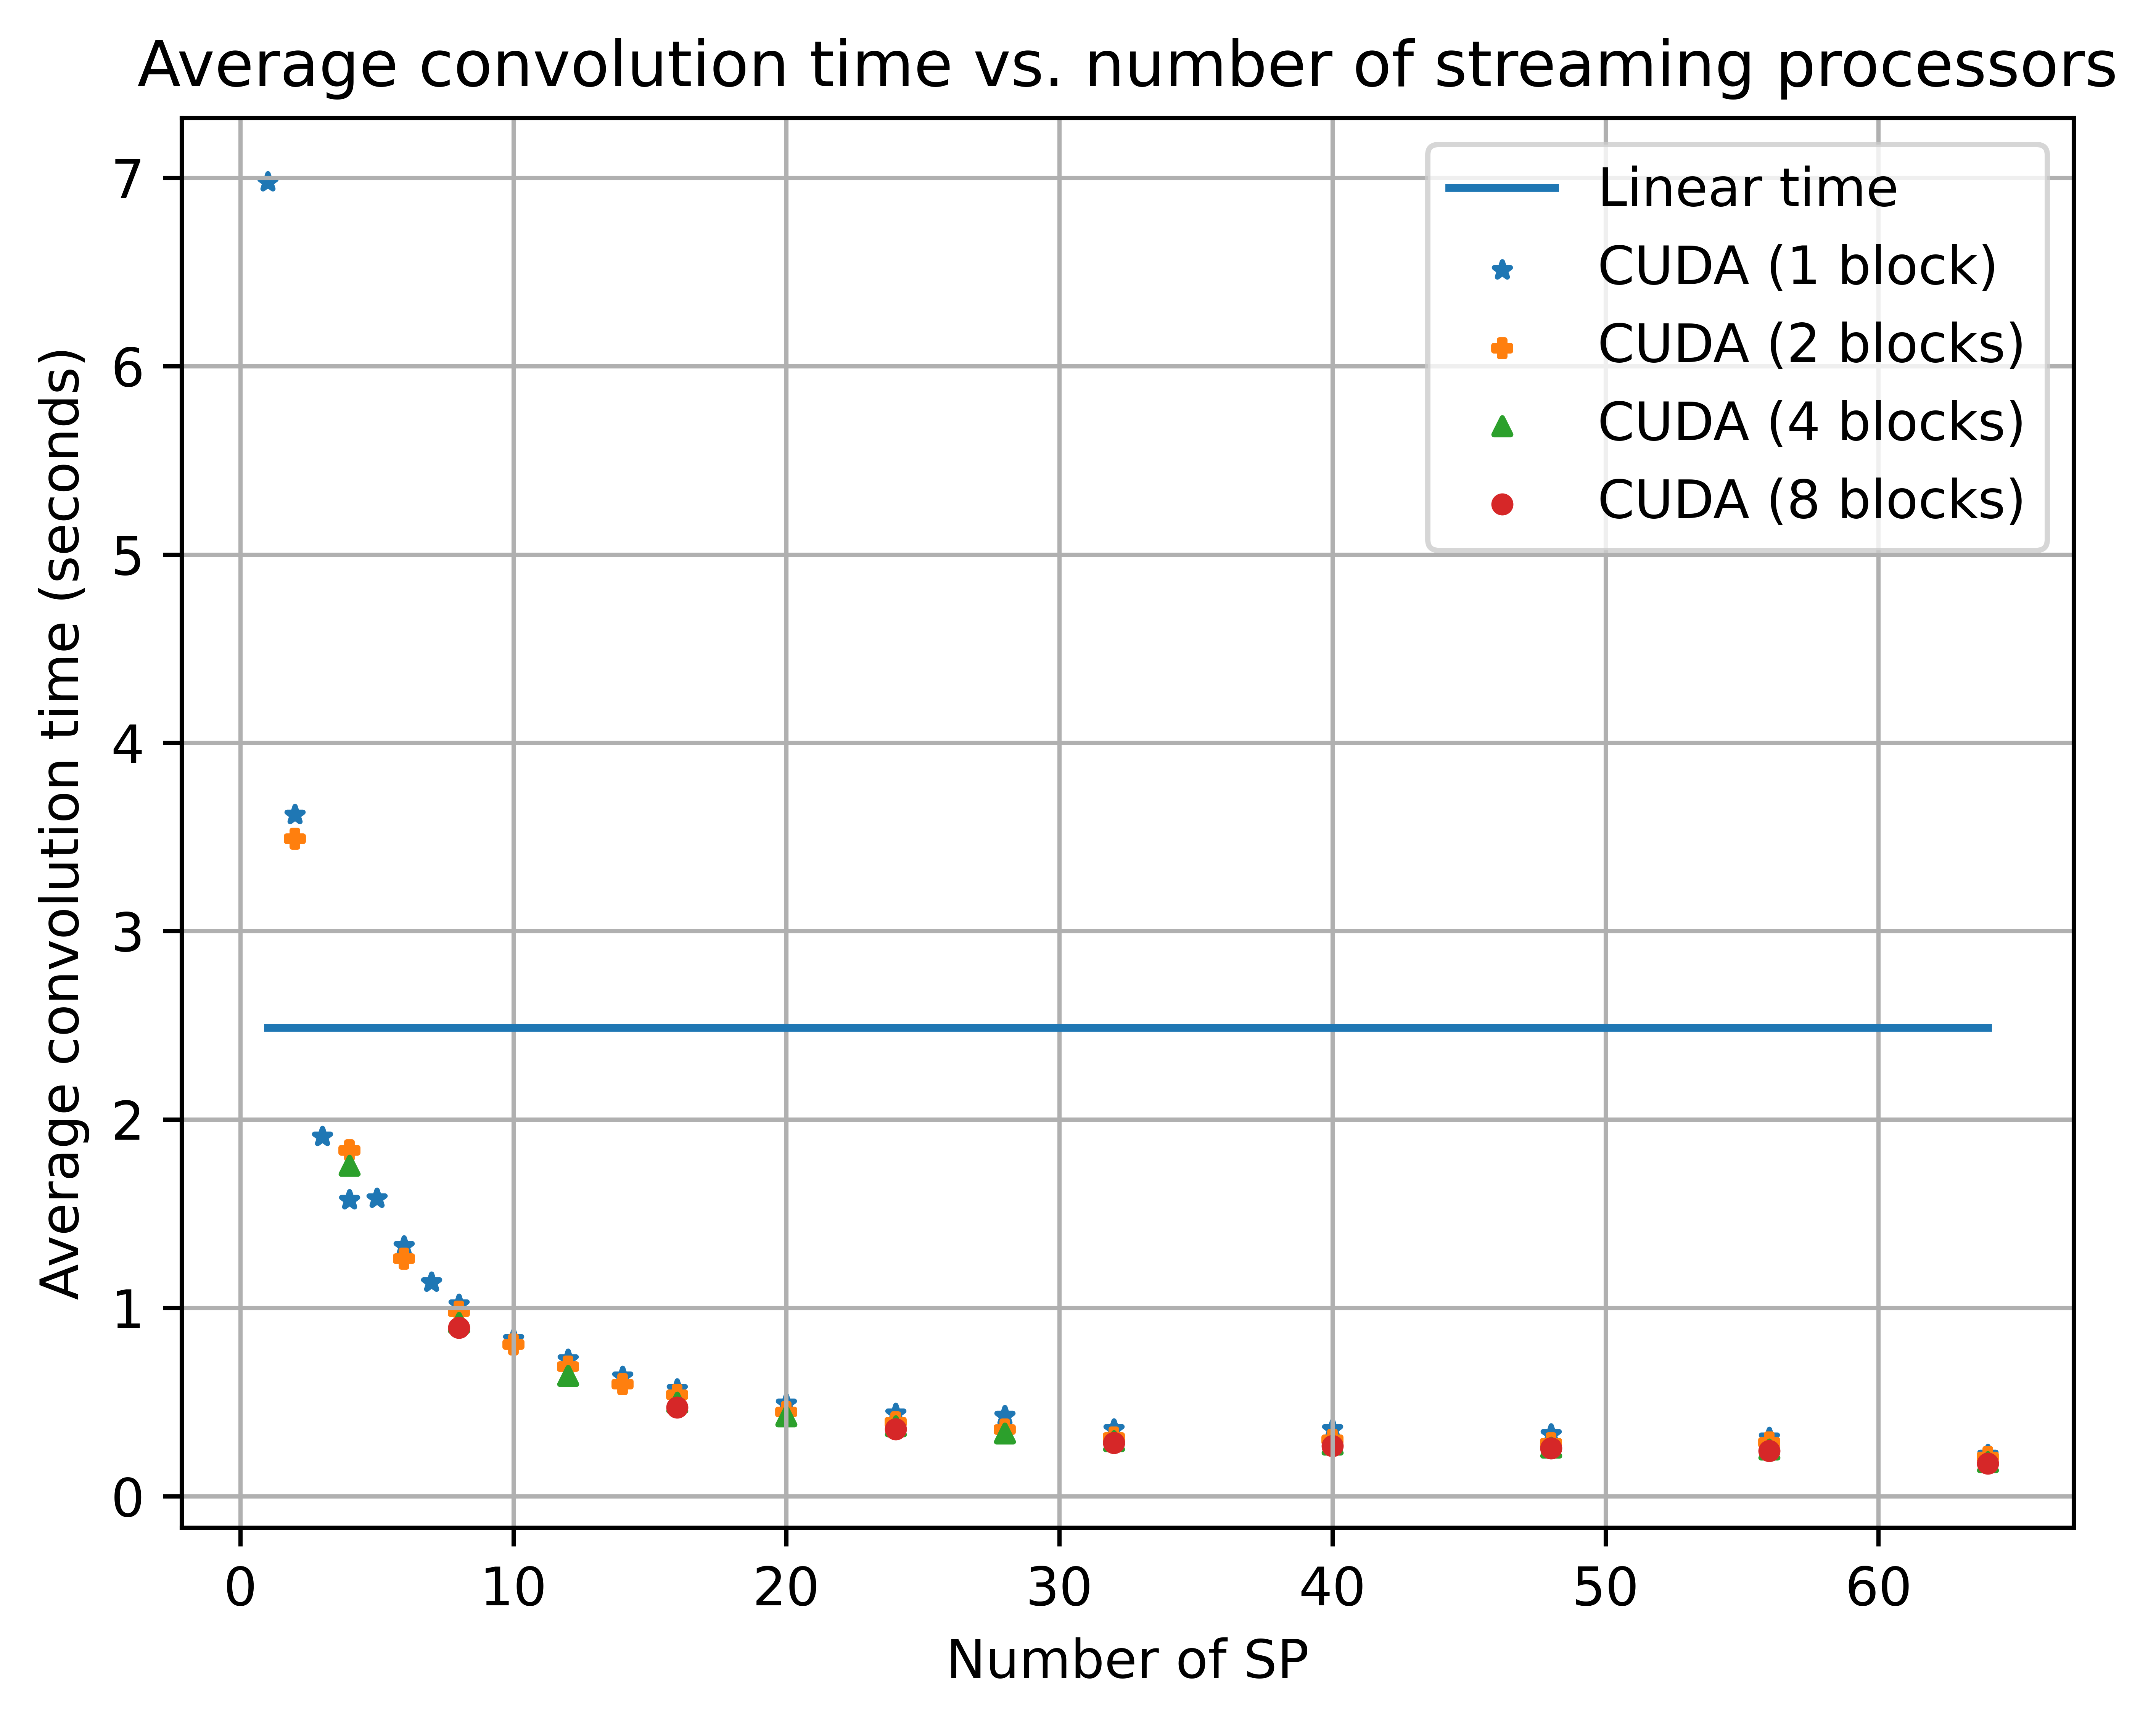

In [89]:
fig7, ax7 = plt.subplots()
fig7.dpi = 1000
ax7.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax7.scatter(thread_num, cd1blk_imp, label="CUDA (1 block)", s=10, marker="*")
ax7.scatter(thread_num , cd2blk_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax7.scatter(thread_num, cd4blk_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax7.scatter(thread_num, cd8blk_imp, label="CUDA (8 blocks)", s=10, marker="o")


ax7.set_xlabel("Number of SP")
ax7.set_ylabel("Average convolution time (seconds)")
ax7.set_title("Average convolution time vs. number of streaming processors")
ax7.legend()
ax7.grid()

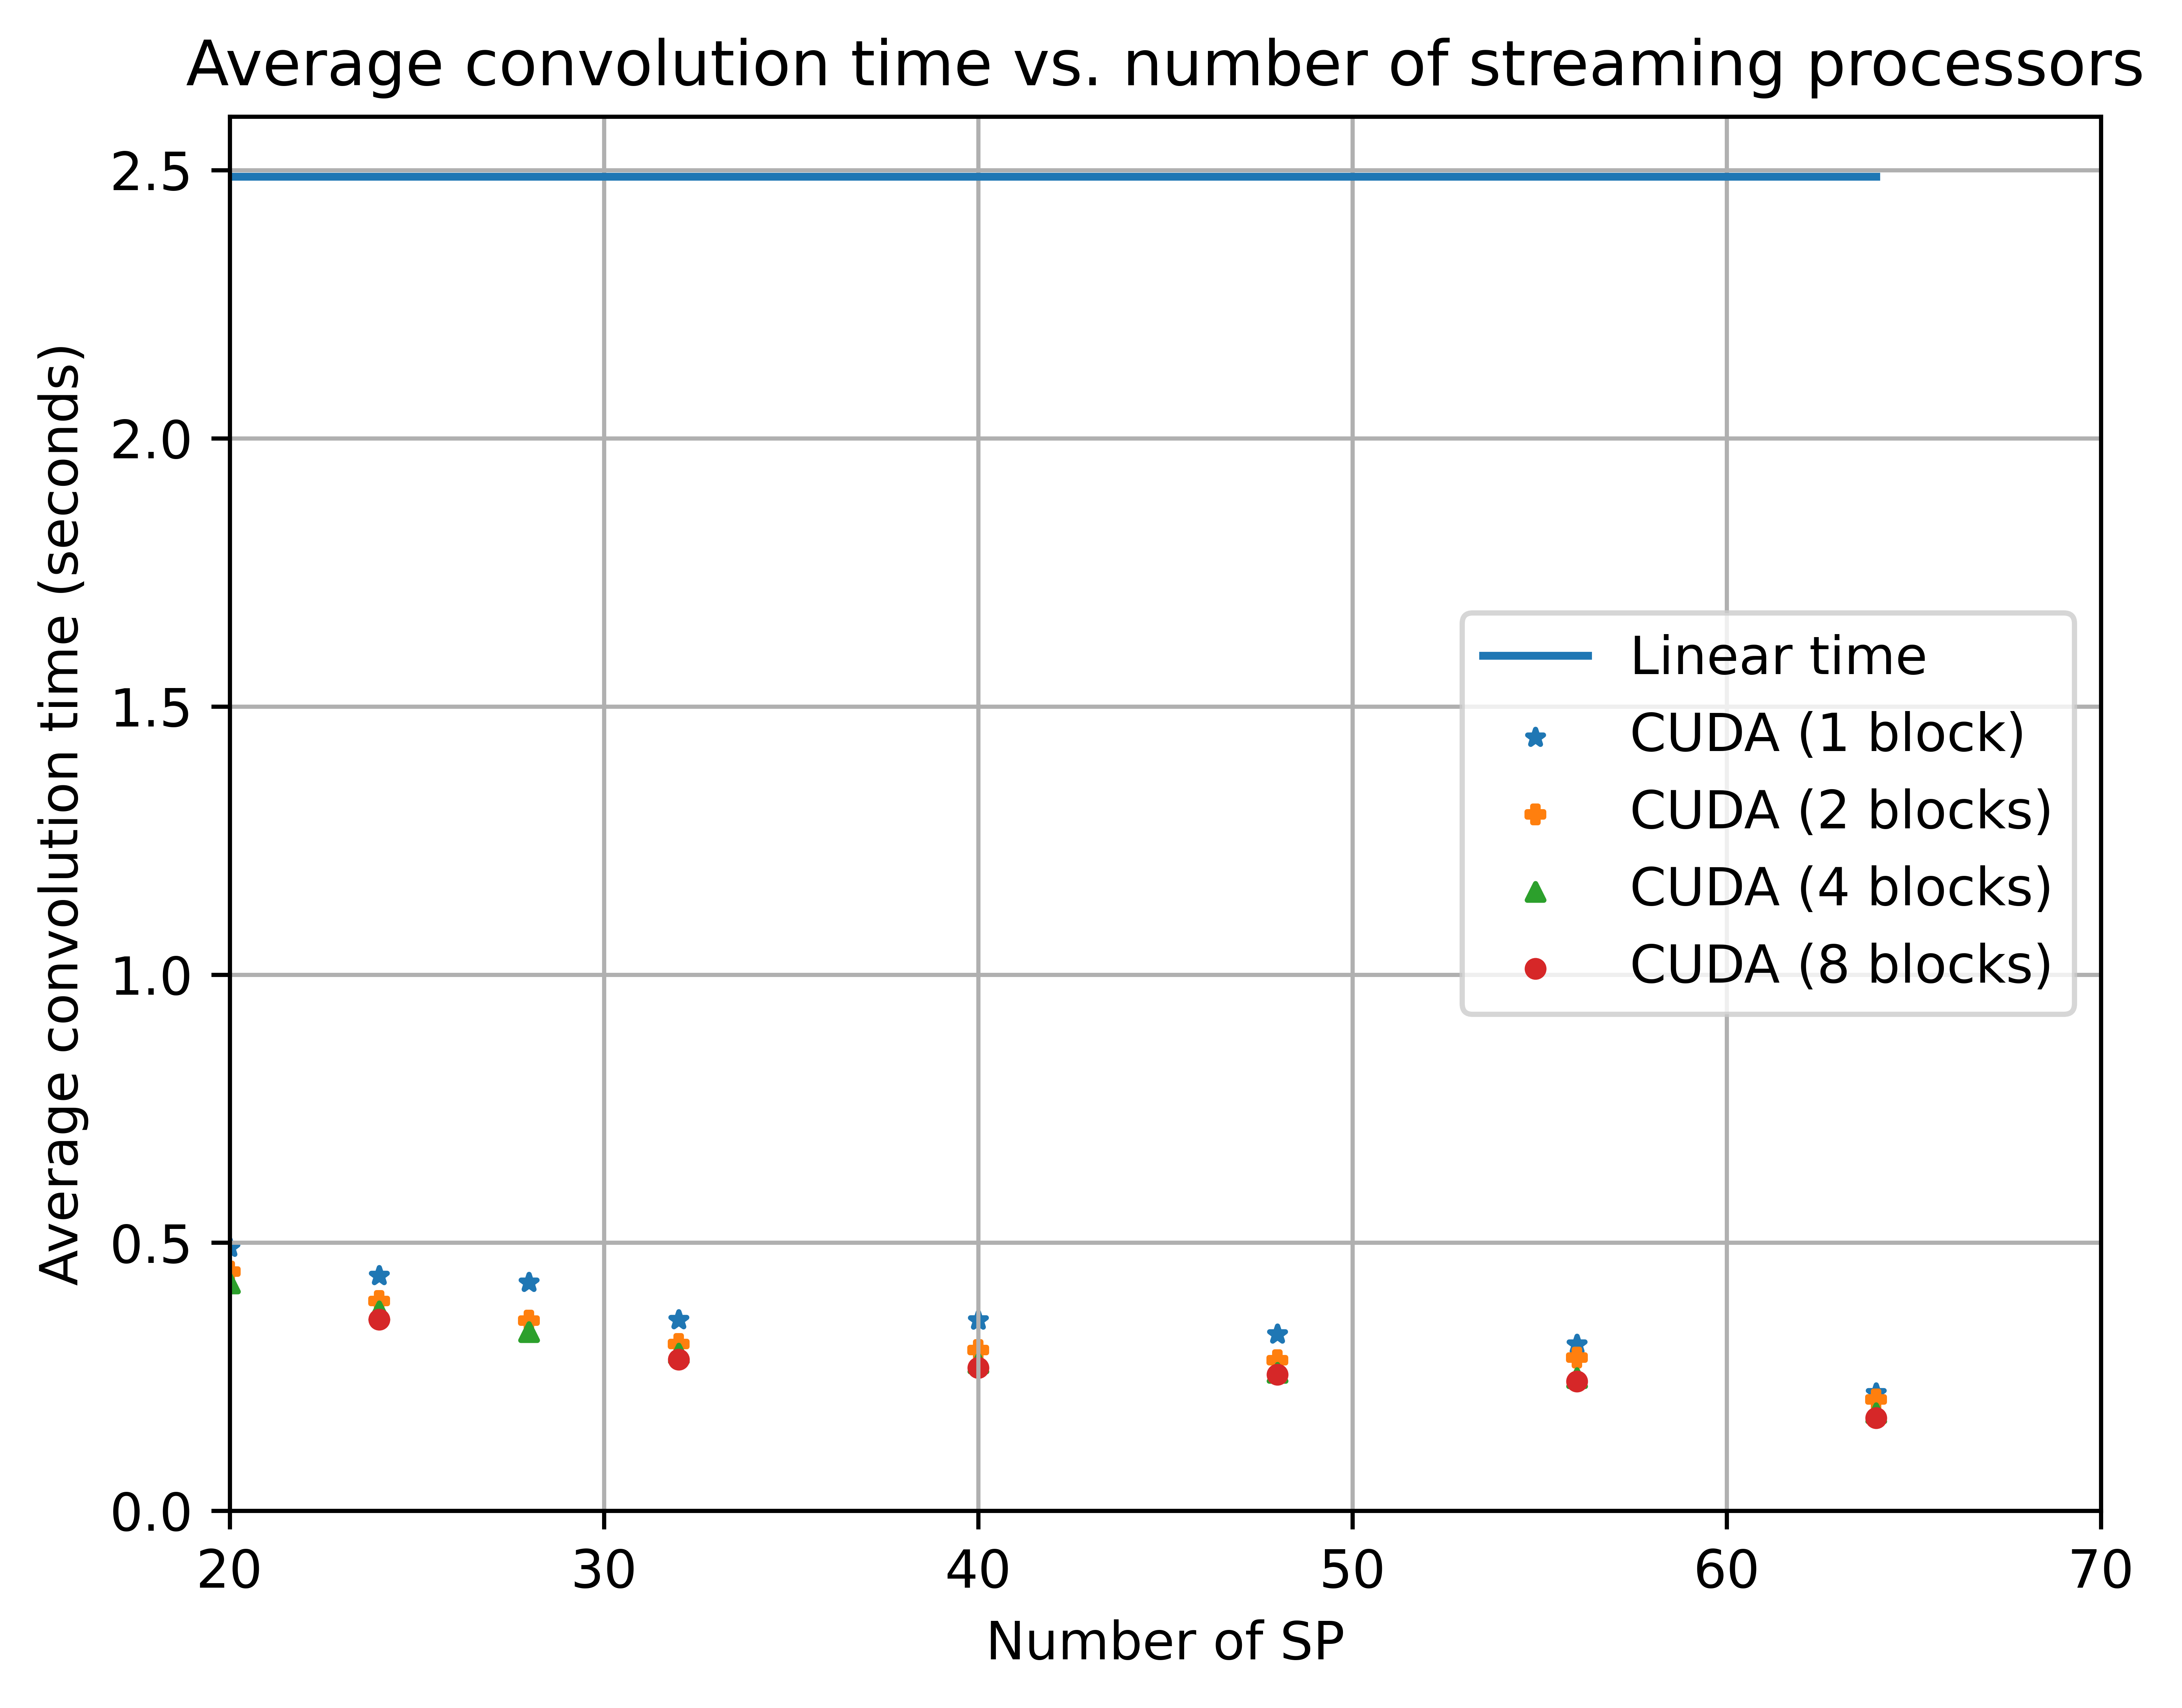

In [96]:
fig8, ax8 = plt.subplots()
fig8.dpi = 1000
ax8.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")
ax8.scatter(thread_num, cd1blk_imp, label="CUDA (1 block)", s=10, marker="*")
ax8.scatter(thread_num , cd2blk_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax8.scatter(thread_num, cd4blk_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax8.scatter(thread_num, cd8blk_imp, label="CUDA (8 blocks)", s=10, marker="o")

ax8.set_xlim(20,70)
ax8.set_ylim(0,2.6)
ax8.set_xlabel("Number of SP")
ax8.set_ylabel("Average convolution time (seconds)")
ax8.set_title("Average convolution time vs. number of streaming processors")
ax8.legend()
ax8.grid()

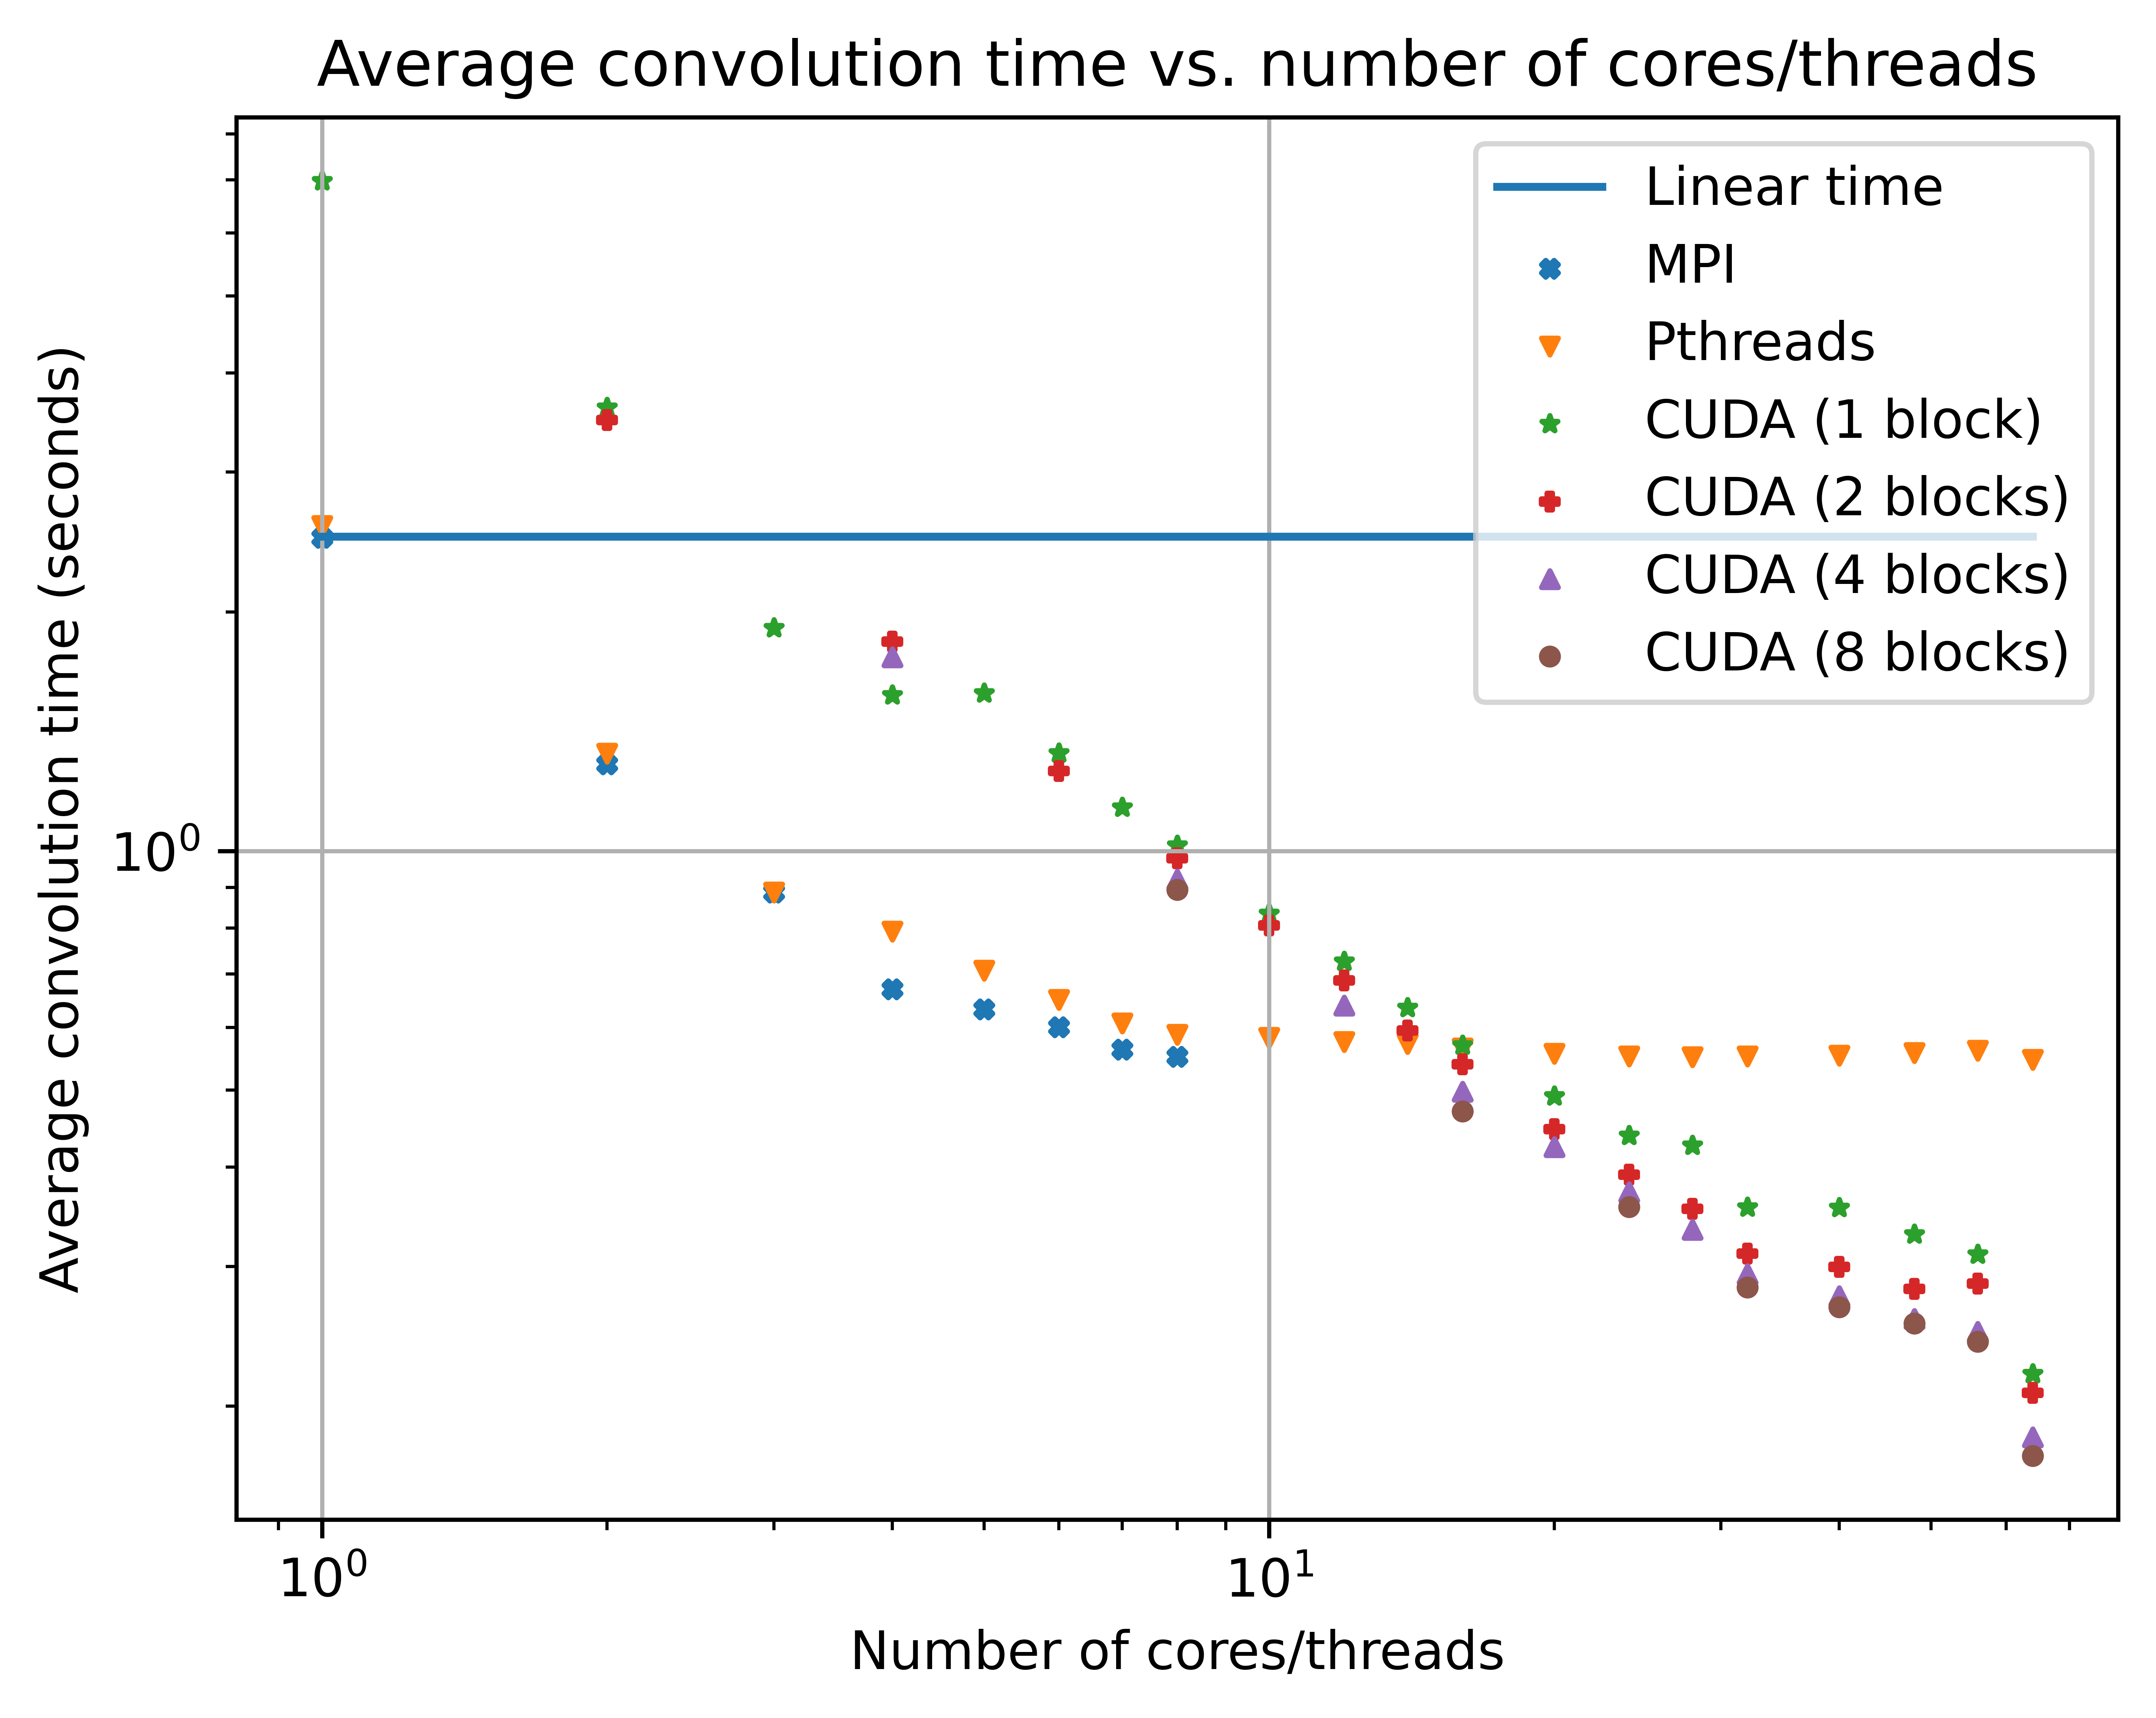

In [109]:
fig9, ax9 = plt.subplots()
fig9.dpi = 1000
ax9.plot(thread_num, [lin_imp] * len(thread_num), label="Linear time")

ax9.scatter(thread_num, MPI_imp, label="MPI", s=10, marker="X")
ax9.scatter(thread_num, pth_imp, label="Pthreads", s=10, marker="v")
ax9.scatter(thread_num, cd1blk_imp, label="CUDA (1 block)", s=10, marker="*")
ax9.scatter(thread_num, cd2blk_imp, label="CUDA (2 blocks)", s=10, marker="P")
ax9.scatter(thread_num, cd4blk_imp, label="CUDA (4 blocks)", s=10, marker="^")
ax9.scatter(thread_num, cd8blk_imp, label="CUDA (8 blocks)", s=10, marker="o")

ax9.set_xlabel("Number of cores/threads")
ax9.set_xscale("log")
ax9.set_ylabel("Average convolution time (seconds)")
ax9.set_yscale("log")
ax9.set_title("Average convolution time vs. number of cores/threads")
ax9.minorticks_on()
ax9.legend(loc="upper right")
ax9.grid()